## First part of the code focuses on player-specific pass receive zones, team pressure zones and player-specific pressure and ball recovery zones (code by Mizgan)

In [1]:
from statsbombpy import sb #statsbomb library

In [2]:
import matplotlib.pyplot as plt

In [4]:
sb.competitions()

C:\Users\mizga\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [22]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [23]:
matches = sb.matches(
    competition_id=9,  # ID for Bundesliga
    season_id=281,    # ID for the 2023/24 season
)
bayer_games = matches[
    (matches['home_team'] == 'Bayer Leverkusen') | 
    (matches['away_team'] == 'Bayer Leverkusen')
]

In [24]:
all_events = []
for match_id in bayer_games['match_id']:
    match_events = sb.events(match_id=match_id)
    all_events.append(match_events)
events_df = pd.concat(all_events)


In [7]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
merged_df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])

In [11]:
# Filter for Bayer Leverkusen events and drop NaN values in the 'player' column
leverkusen_events = events_df[events_df['team'] == "Bayer Leverkusen"]
leverkusen_events = leverkusen_events.dropna(subset=['player'])

# Get unique player names
leverkusen_players = leverkusen_events['player'].unique()

# Convert to a sorted list for easier readability
leverkusen_players = sorted(leverkusen_players)

# Display the list of players
print("Bayer Leverkusen Squad for 2023/24 Bundesliga Season:")
for player in leverkusen_players:
    print(player)


Bayer Leverkusen Squad for 2023/24 Bundesliga Season:
Adam Hložek
Alejandro Grimaldo García
Amine Adli
Arthur Augusto de Matos Soares
Borja Iglesias Quintas
Edmond Fayçal Tapsoba
Exequiel Alejandro Palacios
Florian Wirtz
Granit Xhaka
Gustavo Adolfo Puerta Molano
Jeremie Frimpong
Jonas Hofmann
Jonathan Tah
Josip Stanišić
Lukáš Hrádecký
Matěj Kovář
Nadiem Amiri
Nathan Tella
Noah Mbamba
Odilon Kossonou
Patrik Schick
Piero Martín Hincapié Reyna
Robert Andrich
Victor Okoh Boniface


### Pass Receipt Zones for each Player

In [12]:
player_name = "Granit Xhaka"  # Change to any player name for their visual from the code cell below

C:\Users\mizga\AppData\Local\Temp\ipykernel_23444\2649157235.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_received_df['zone'] = passes_received_df['pass_end_location'].apply(


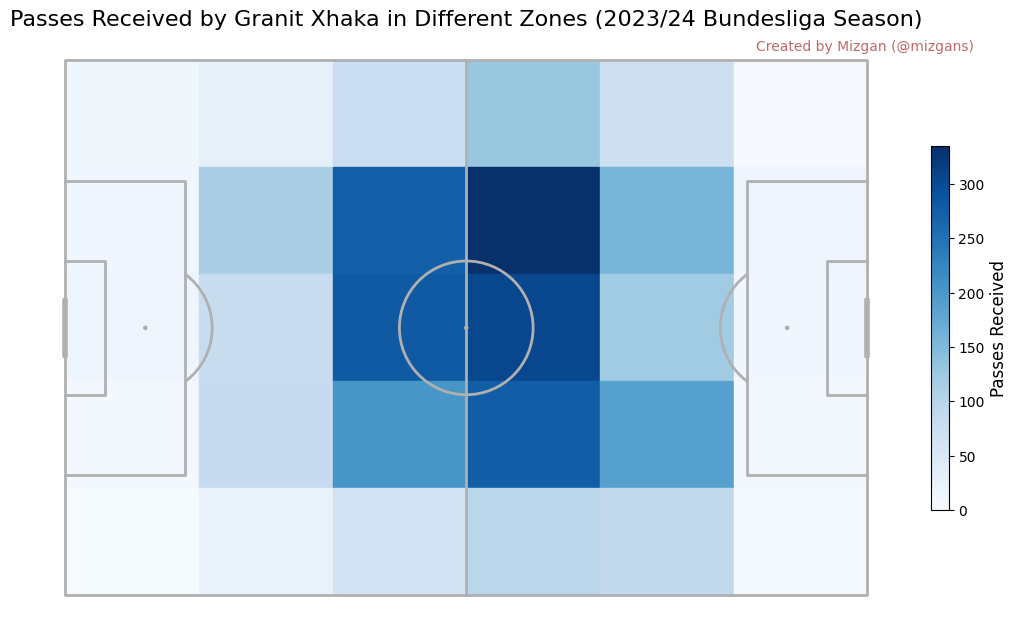

In [13]:
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Filter passes received by Xhaka
passes_received_df = events_df[
    (events_df['team'] == "Bayer Leverkusen") &
    (events_df['pass_recipient'] == player_name) &
    (events_df['pass_end_location'].notna())
]

# Define the pitch dimensions for StatsBomb
pitch_width = 80
pitch_length = 120

# Define the number of zones (e.g., 6x5 grid)
n_x = 6  # Number of zones along the length
n_y = 5  # Number of zones along the width

# Calculate zone boundaries
x_bins = np.linspace(0, pitch_length, n_x + 1)
y_bins = np.linspace(0, pitch_width, n_y + 1)

# Assign each pass to a zone
def find_zone(x, y, x_bins, y_bins):
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            if x_bins[i] <= x < x_bins[i + 1] and y_bins[j] <= y < y_bins[j + 1]:
                return (i, j)
    return None

passes_received_df['zone'] = passes_received_df['pass_end_location'].apply(
    lambda loc: find_zone(loc[0], loc[1], x_bins, y_bins)
)

# Count passes in each zone
zone_counts = passes_received_df['zone'].value_counts().to_dict()

# Normalize counts for color mapping
max_count = max(zone_counts.values()) if zone_counts else 1  # Avoid division by zero
norm = Normalize(vmin=0, vmax=max_count)
cmap = plt.cm.Blues  # Use a blue color map

# Plot the pitch with colored zones
pitch = Pitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(10, 8))

# Draw zones with colors
for i in range(len(x_bins) - 1):
    for j in range(len(y_bins) - 1):
        # Zone boundaries
        x_start = x_bins[i]
        x_end = x_bins[i + 1]
        y_start = y_bins[j]
        y_end = y_bins[j + 1]

        # Get pass count for this zone
        count = zone_counts.get((i, j), 0)

        # Determine the color based on the count
        color = cmap(norm(count))

        # Draw the rectangle
        ax.add_patch(plt.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                    color=color, edgecolor="black", lw=1))

# Add a color bar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for color bar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label("Passes Received", fontsize=12)

# Add title
ax.set_title(f"Passes Received by {player_name} in Different Zones (2023/24 Bundesliga Season)", fontsize=16)
fig.text(0.95,0.86, "Created by Mizgan (@mizgans)", fontsize=10, color="brown", 
         ha="right", va="top", alpha=0.7)  # Bottom right corner

plt.show()

### Defensive Pressure Zone of the team

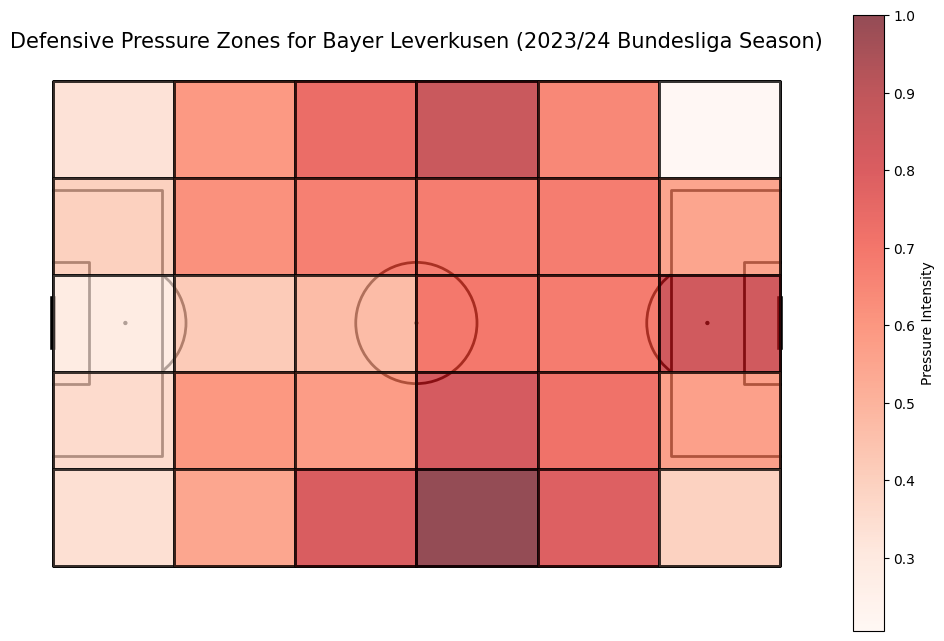

In [26]:
from mplsoccer import Pitch
import numpy as np
import matplotlib.pyplot as plt

# Filter pressure events for Bayer Leverkusen
pressure_events = events_df[
    (events_df['team'] == "Bayer Leverkusen") & 
    (events_df['type'] == "Pressure") &
    (events_df['location'].notna())
]

# Extract pressure locations
pressure_locations = np.array(pressure_events['location'].tolist())

# Define pitch zones (e.g., 6x5 grid)
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
bins_x = np.linspace(0, 120, 7)  # 6 vertical zones
bins_y = np.linspace(0, 80, 6)   # 5 horizontal zones

# Calculate the 2D histogram of pressure locations
pressure_heatmap, x_edges, y_edges = np.histogram2d(
    pressure_locations[:, 0],  # x-coordinates
    pressure_locations[:, 1],  # y-coordinates
    bins=[bins_x, bins_y]
)

# Normalize the heatmap (optional, to show relative intensity)
pressure_heatmap_normalized = pressure_heatmap / pressure_heatmap.max()

# Prepare data for the heatmap function (convert to dictionary format)
heatmap_data = {
    'x_grid': x_edges[:-1] + (x_edges[1] - x_edges[0]) / 2,  # center of bins on x-axis
    'y_grid': y_edges[:-1] + (y_edges[1] - y_edges[0]) / 2,  # center of bins on y-axis
    'statistic': pressure_heatmap_normalized.T  # Transpose to match the correct orientation
}

# Plot the heatmap on the pitch
fig, ax = pitch.draw(figsize=(10, 8))
heatmap = pitch.heatmap(heatmap_data, ax=ax, cmap="Reds", alpha=0.7, edgecolors='black')

# Add title and color bar
fig.colorbar(heatmap, ax=ax, orientation='vertical', label='Pressure Intensity', shrink = 0.8)
ax.set_title("Defensive Pressure Zones for Bayer Leverkusen (2023/24 Bundesliga Season)", fontsize=15)
plt.show()


### PLayer-specific Pressure zones

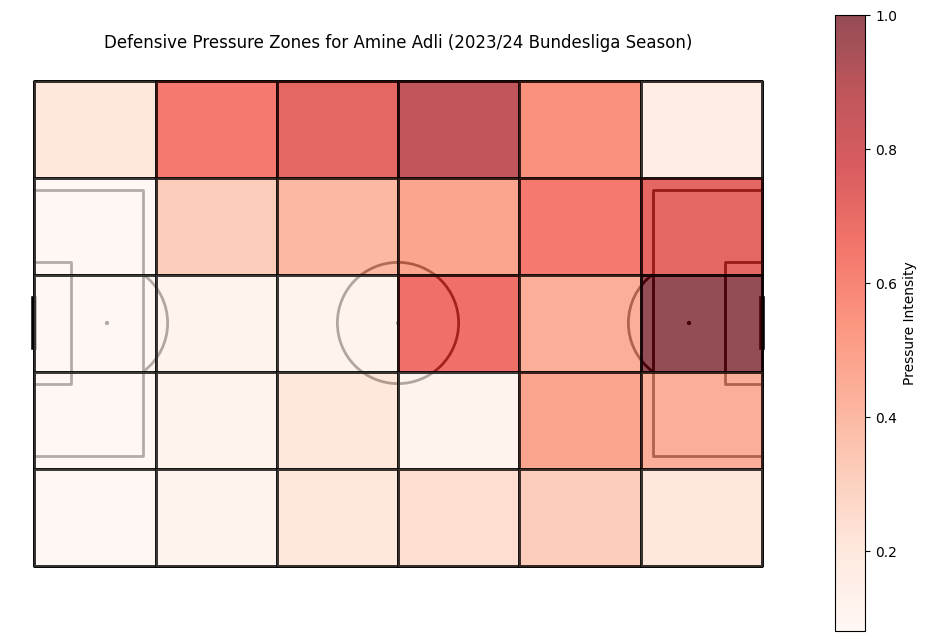

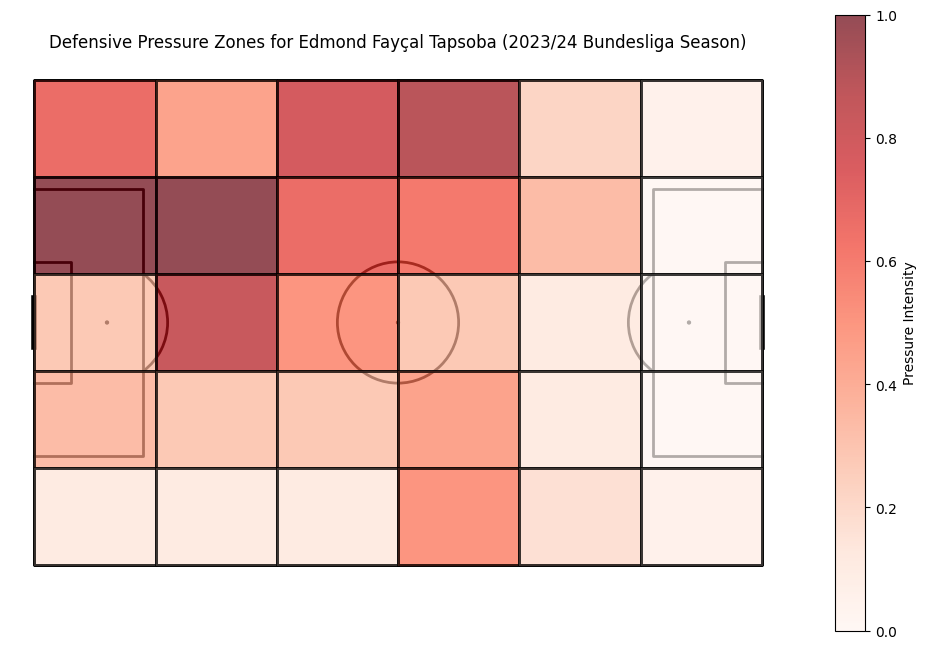

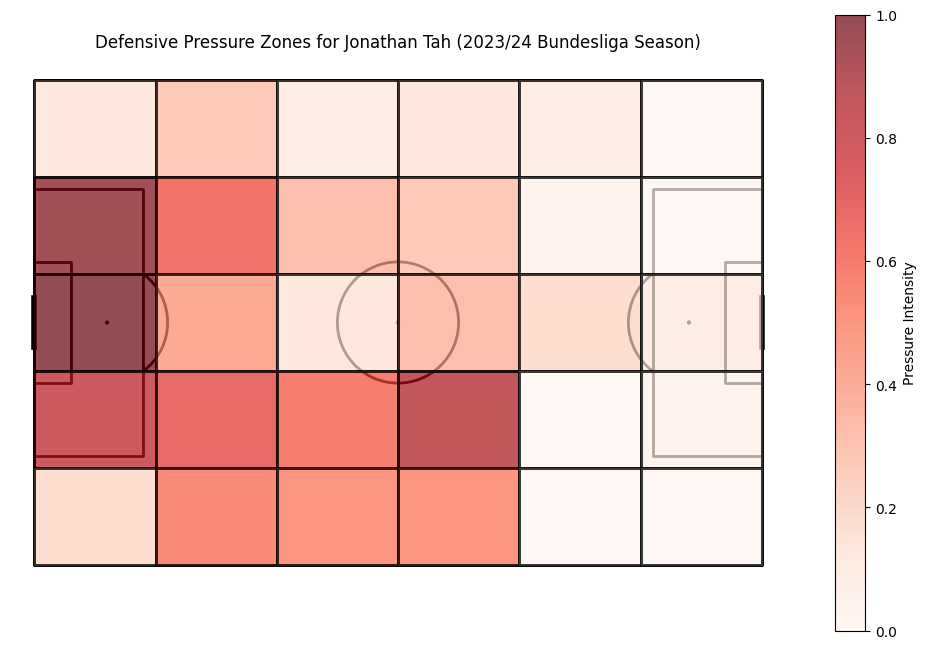

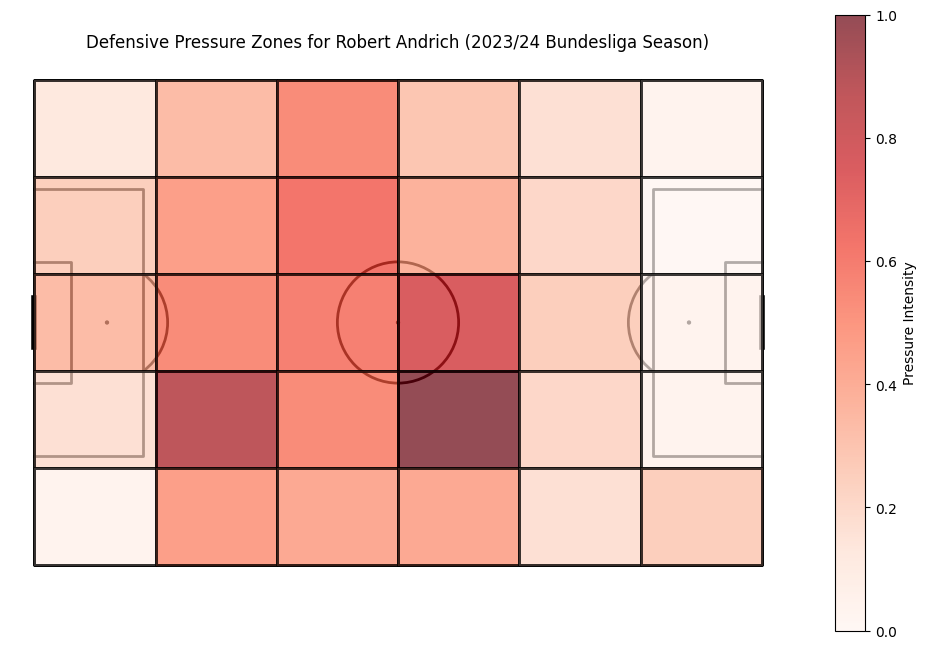

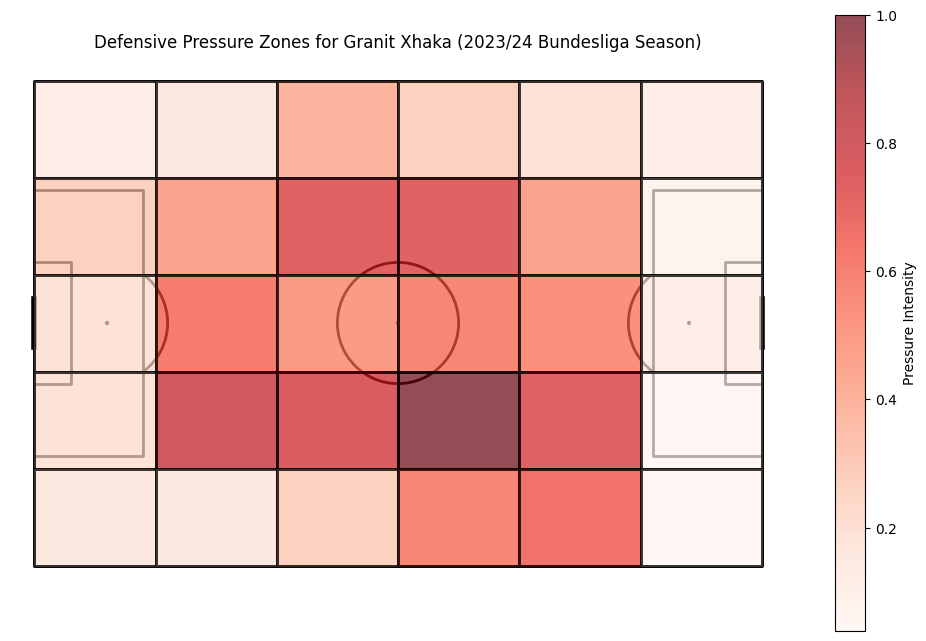

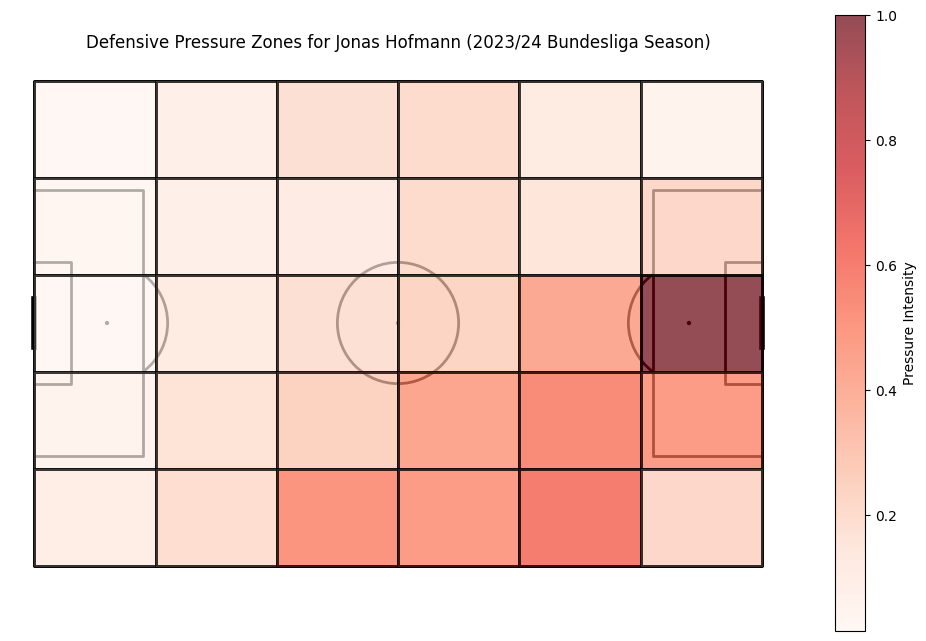

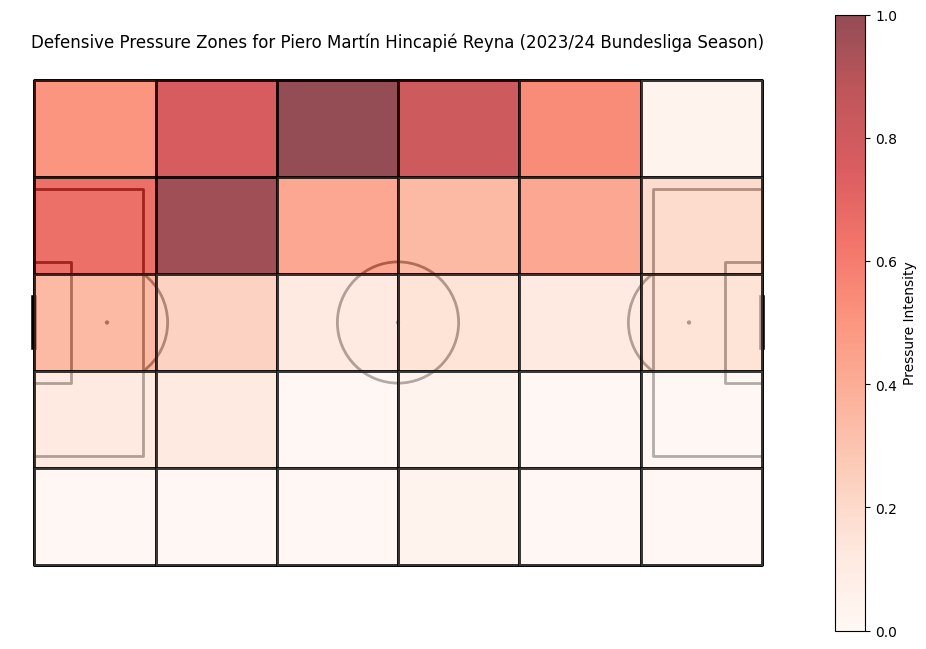

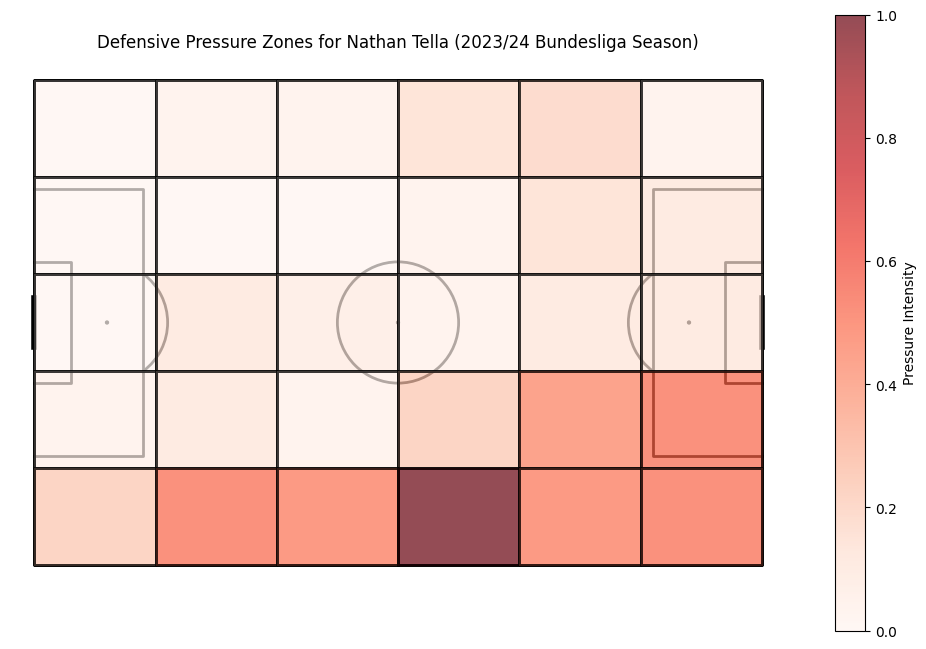

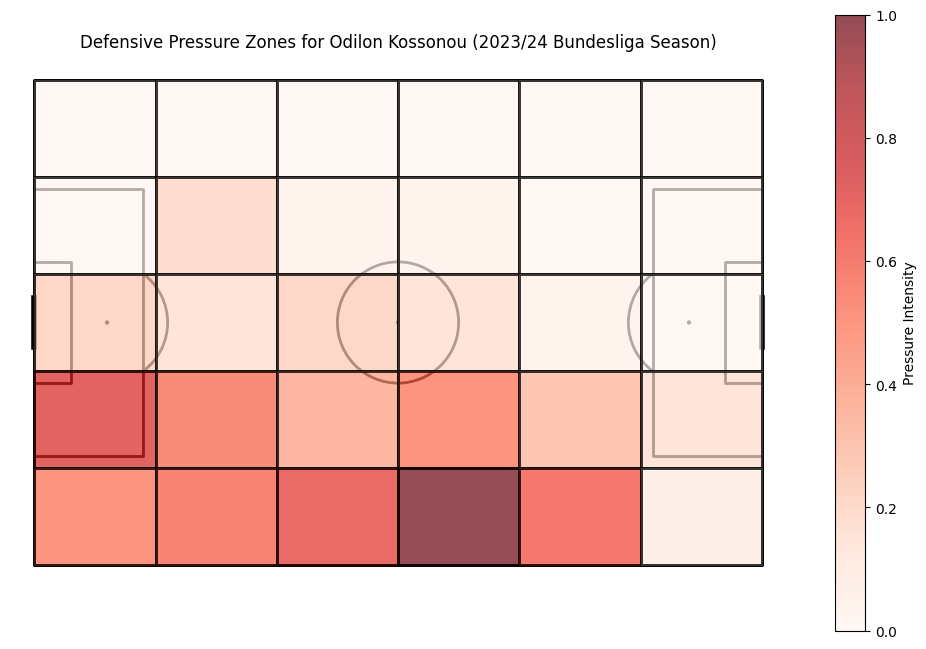

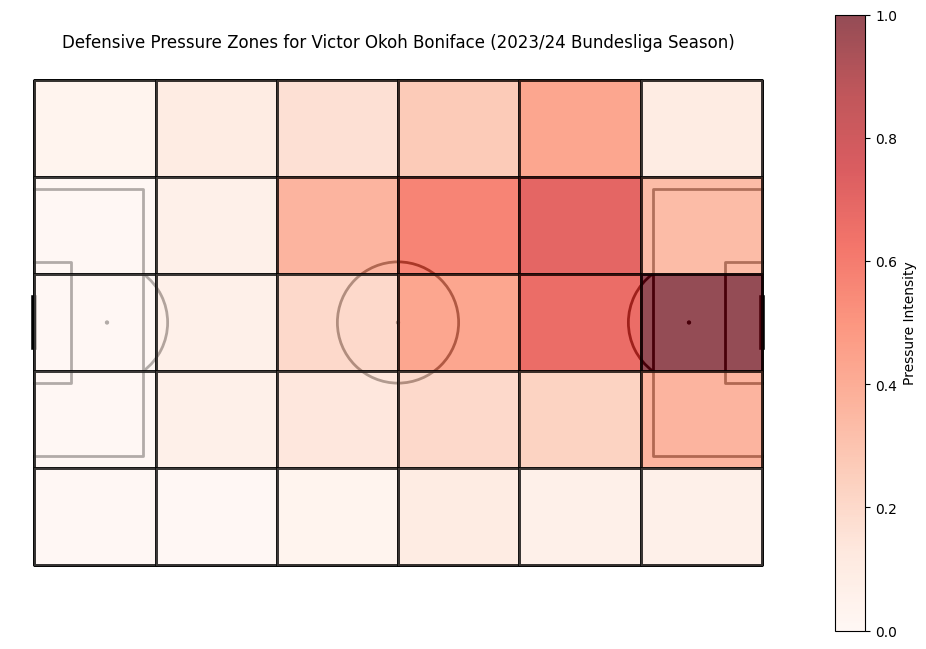

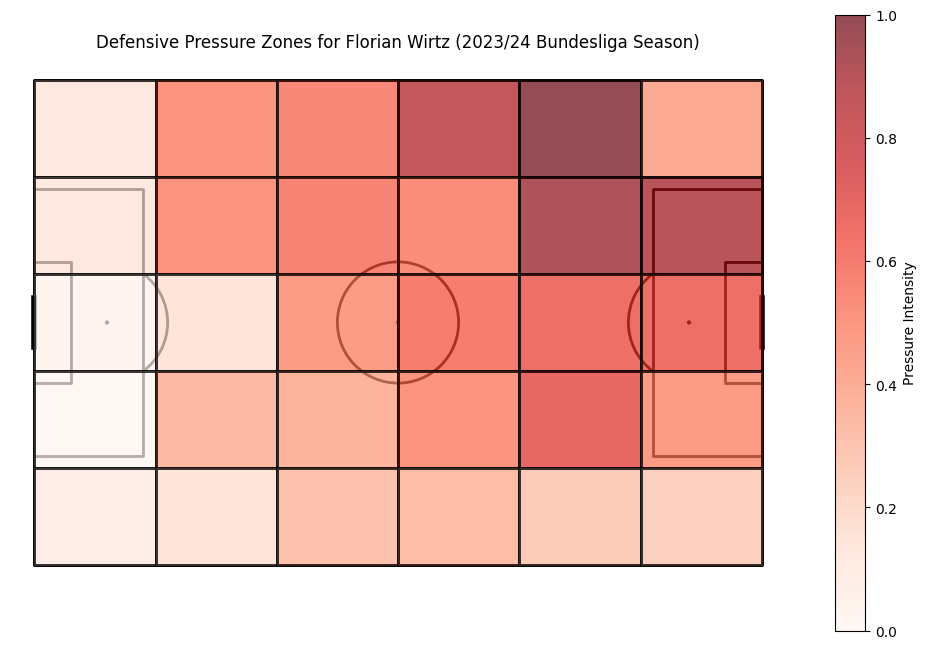

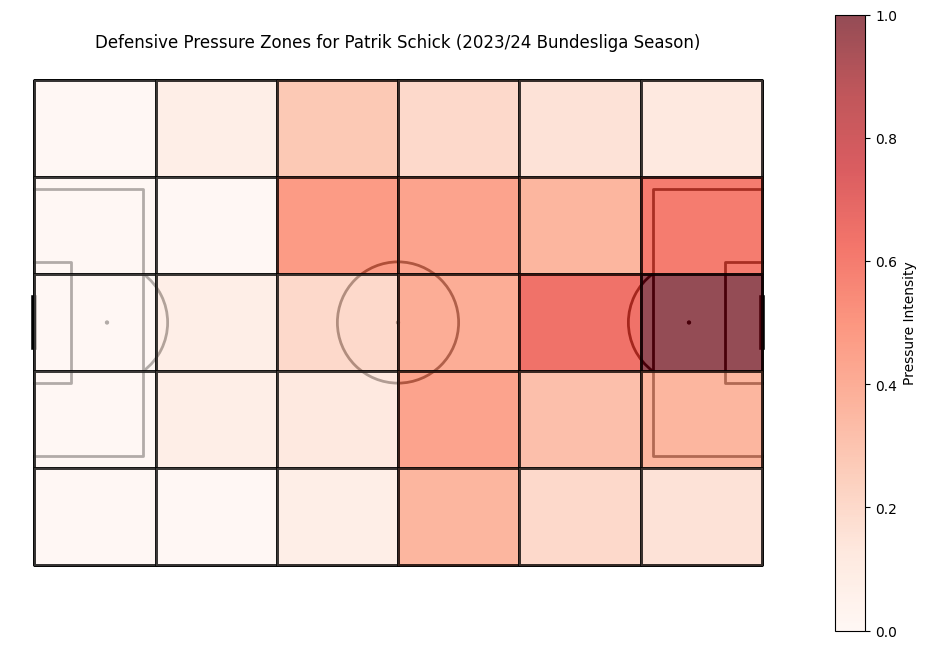

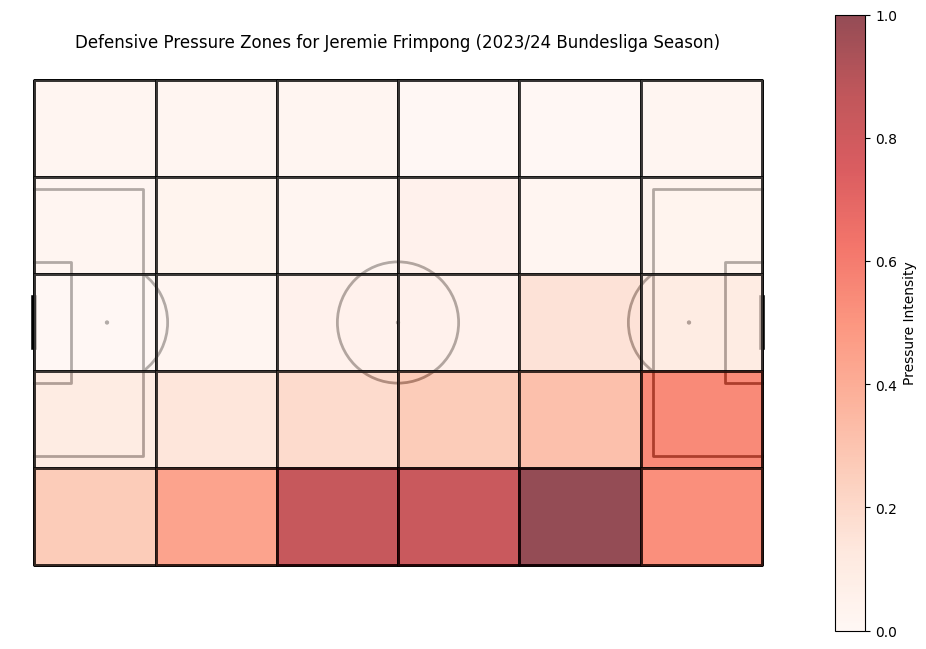

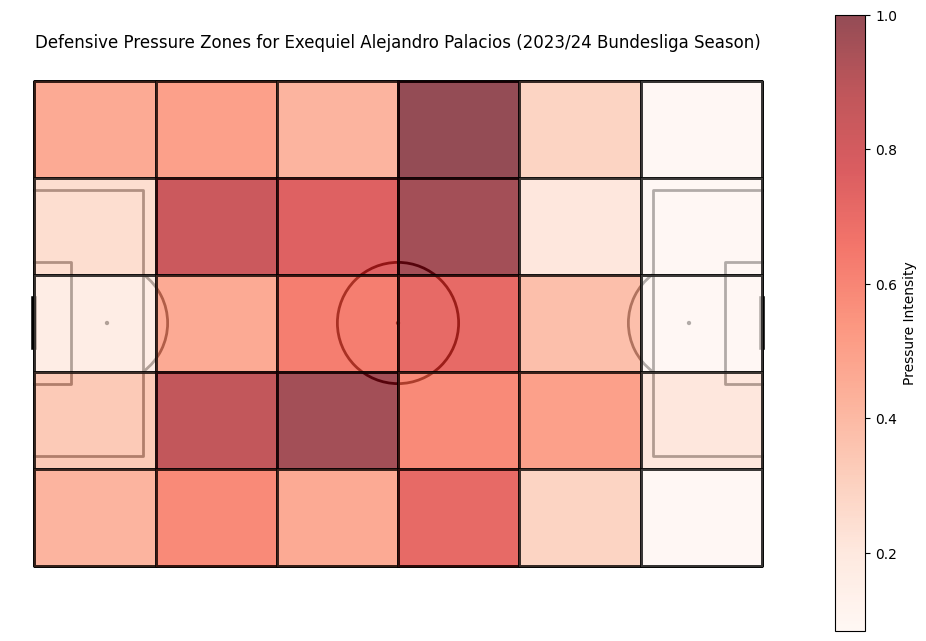

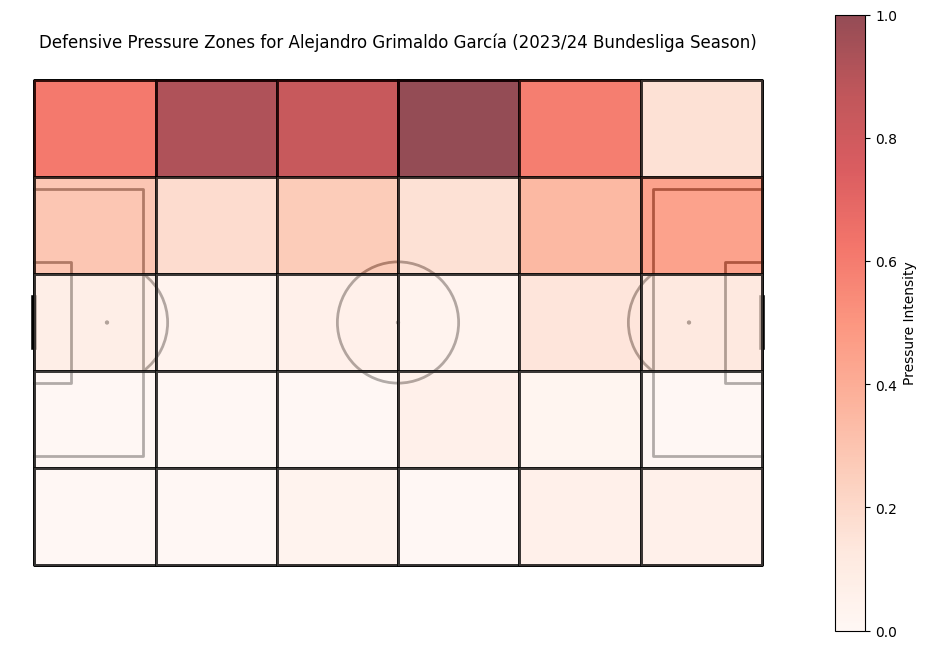

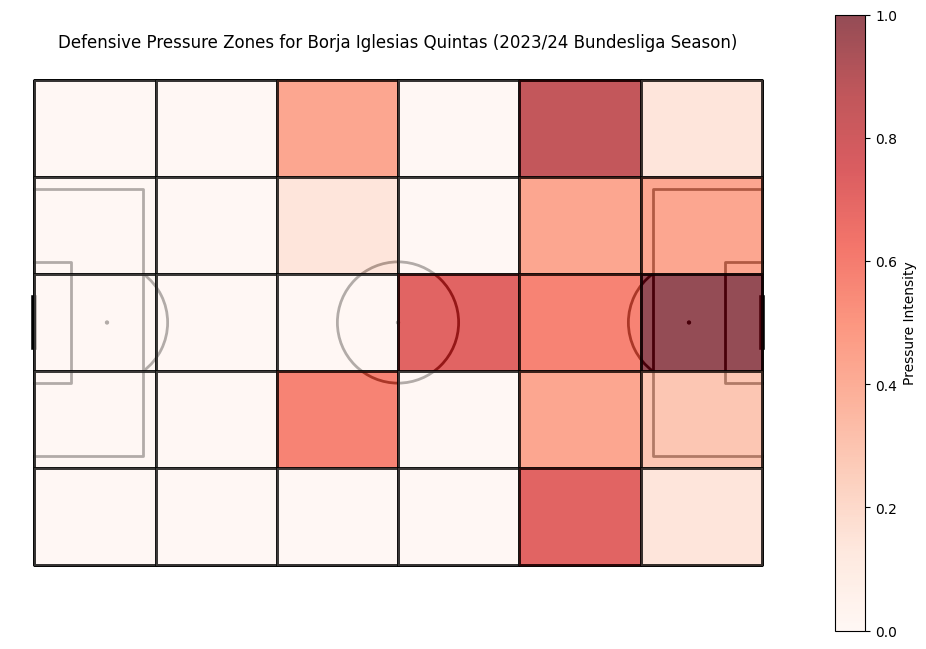

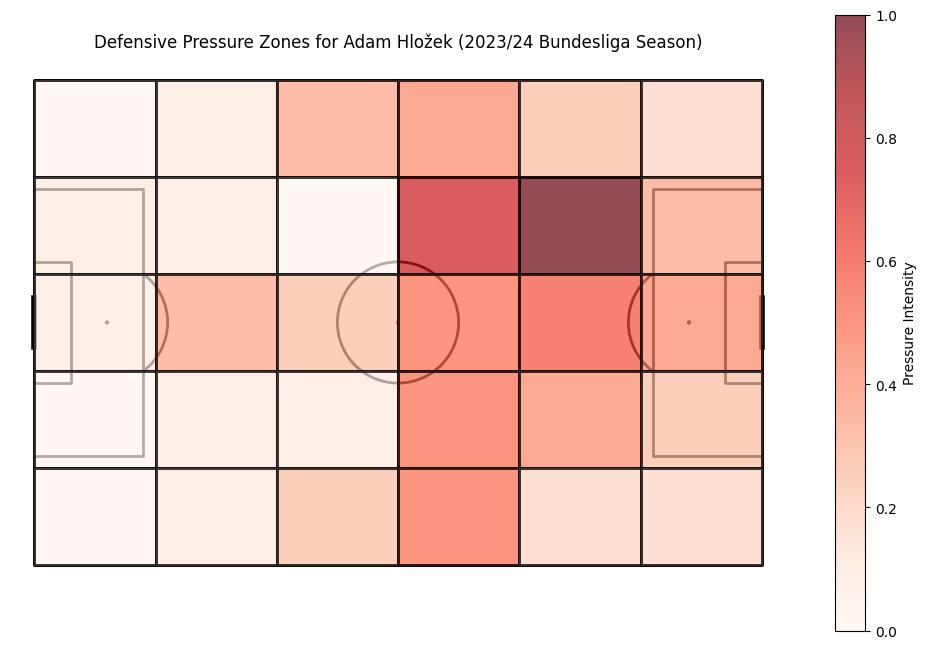

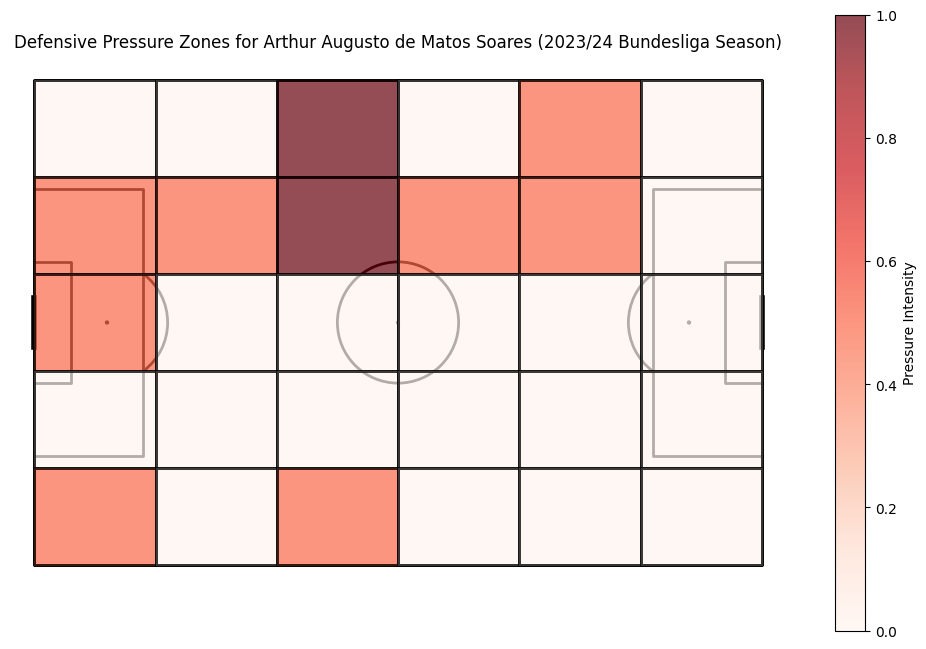

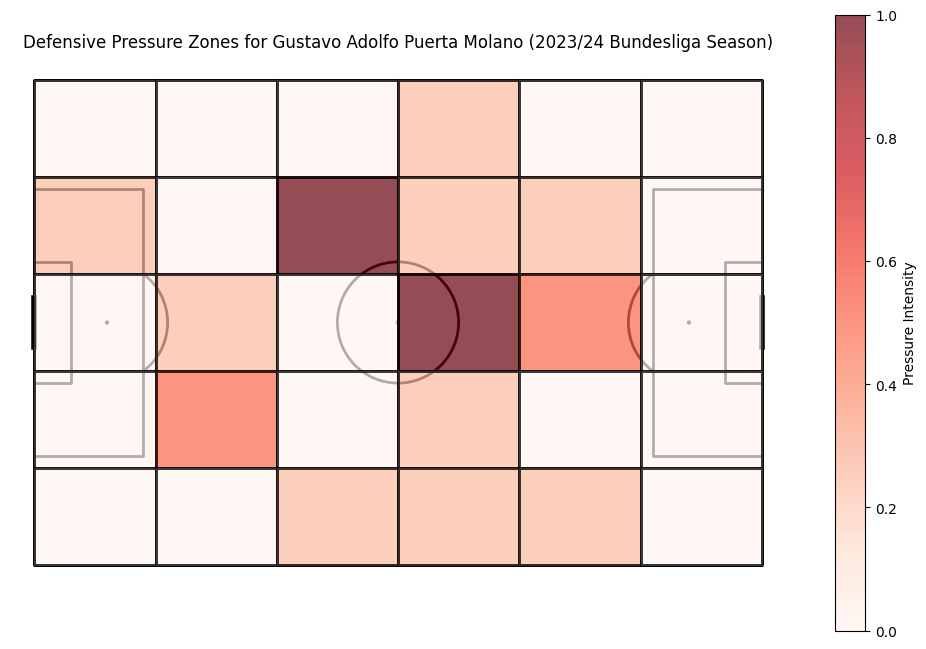

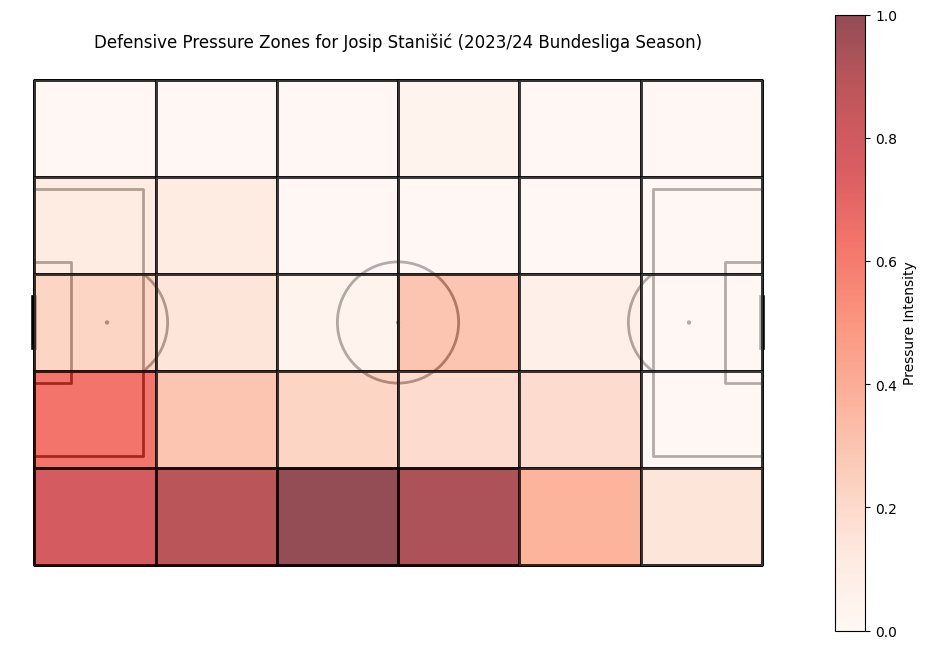

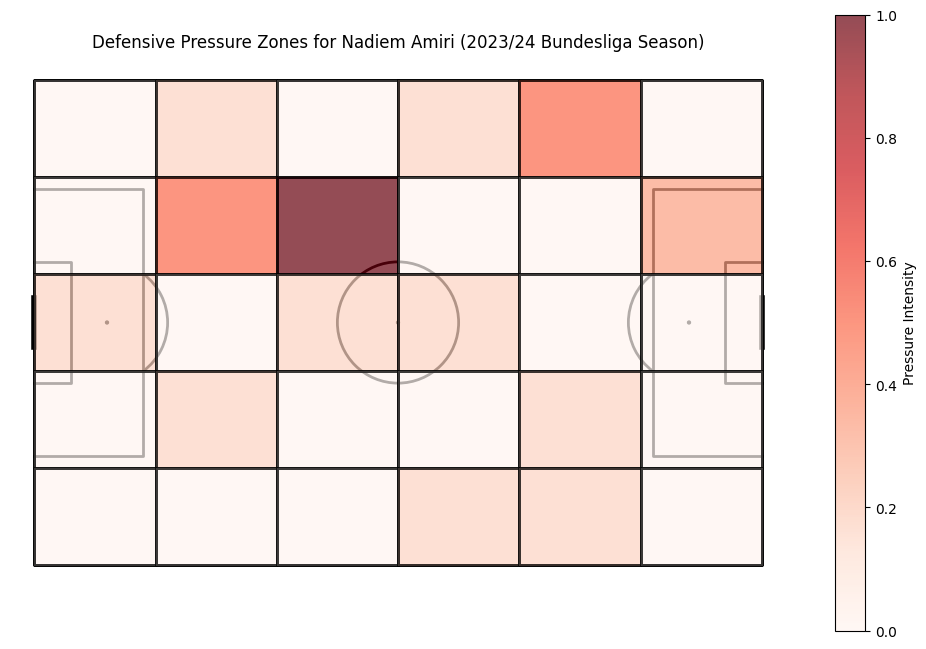

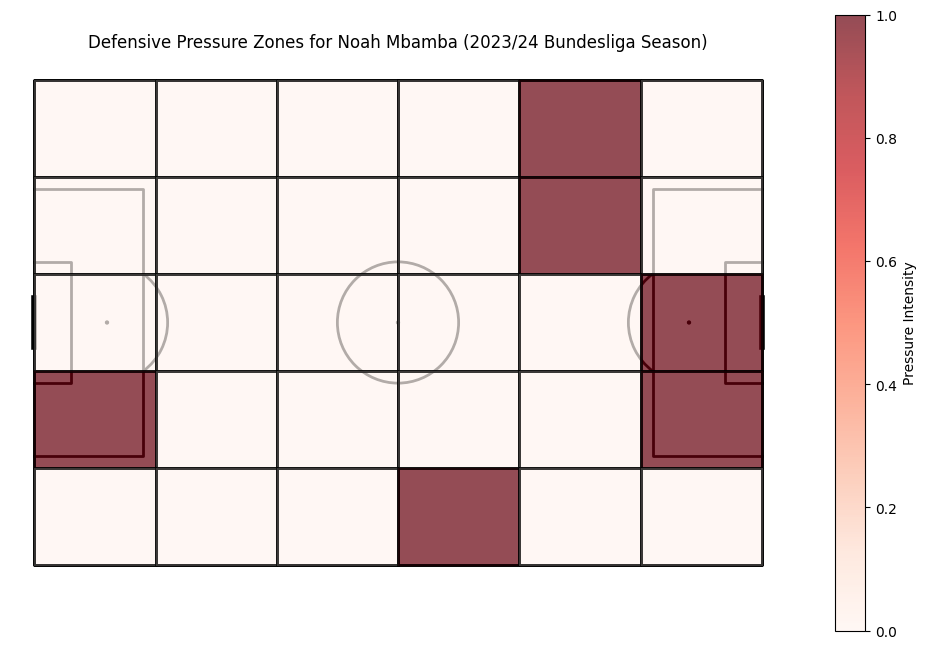

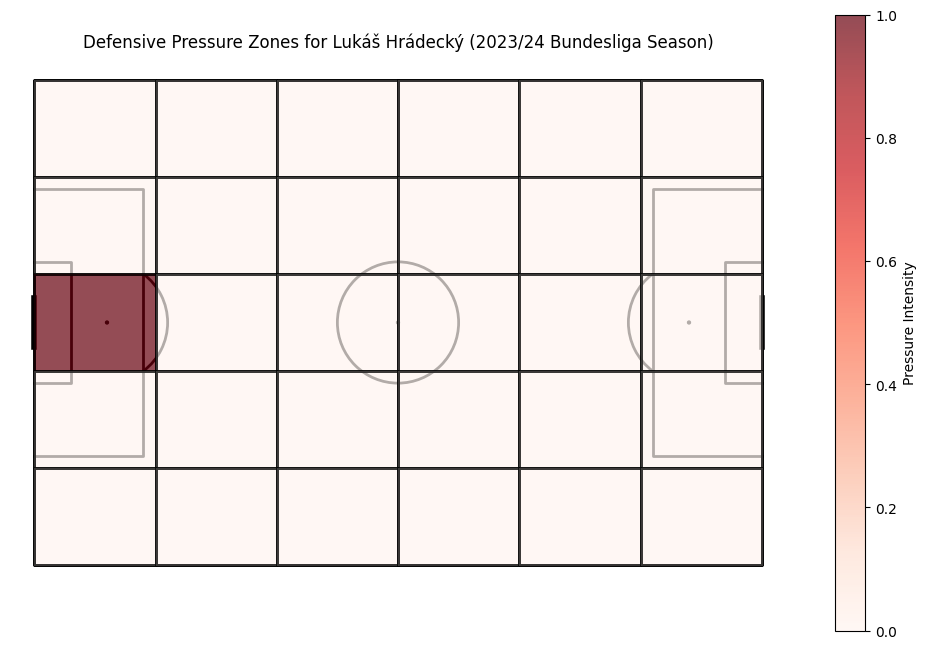

In [105]:
# Extract unique player names
players = pressure_events['player'].unique()

# Define pitch zones (e.g., 6x5 grid)
bins_x = np.linspace(0, 120, 7)  # 6 vertical zones
bins_y = np.linspace(0, 80, 6)   # 5 horizontal zones
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Plot heatmaps for each player
for player in players:
    # Filter events for the player
    player_events = pressure_events[pressure_events['player'] == player]
    if not player_events.empty:
        # Extract pressure locations
        pressure_locations = np.array(player_events['location'].tolist())

        # Calculate 2D histogram for the player
        pressure_heatmap, x_edges, y_edges = np.histogram2d(
            pressure_locations[:, 0],  # x-coordinates
            pressure_locations[:, 1],  # y-coordinates
            bins=[bins_x, bins_y]
        )

        # Normalize the heatmap (optional, to show relative intensity)
        pressure_heatmap_normalized = pressure_heatmap / pressure_heatmap.max()

        # Prepare data for the heatmap function
        heatmap_data = {
            'x_grid': x_edges[:-1] + (x_edges[1] - x_edges[0]) / 2,  # center of bins on x-axis
            'y_grid': y_edges[:-1] + (y_edges[1] - y_edges[0]) / 2,  # center of bins on y-axis
            'statistic': pressure_heatmap_normalized.T  # Transpose to match correct orientation
        }

        # Plot the heatmap for the player
        fig, ax = pitch.draw(figsize=(10, 8))
        heatmap = pitch.heatmap(heatmap_data, ax=ax, cmap="Reds", alpha=0.7, edgecolors='black')

        # Add title and color bar
        fig.colorbar(heatmap, ax=ax, orientation='vertical', label='Pressure Intensity', shrink=0.8)
        ax.set_title(f"Defensive Pressure Zones for {player} (2023/24 Bundesliga Season)", fontsize=12)
        plt.show()


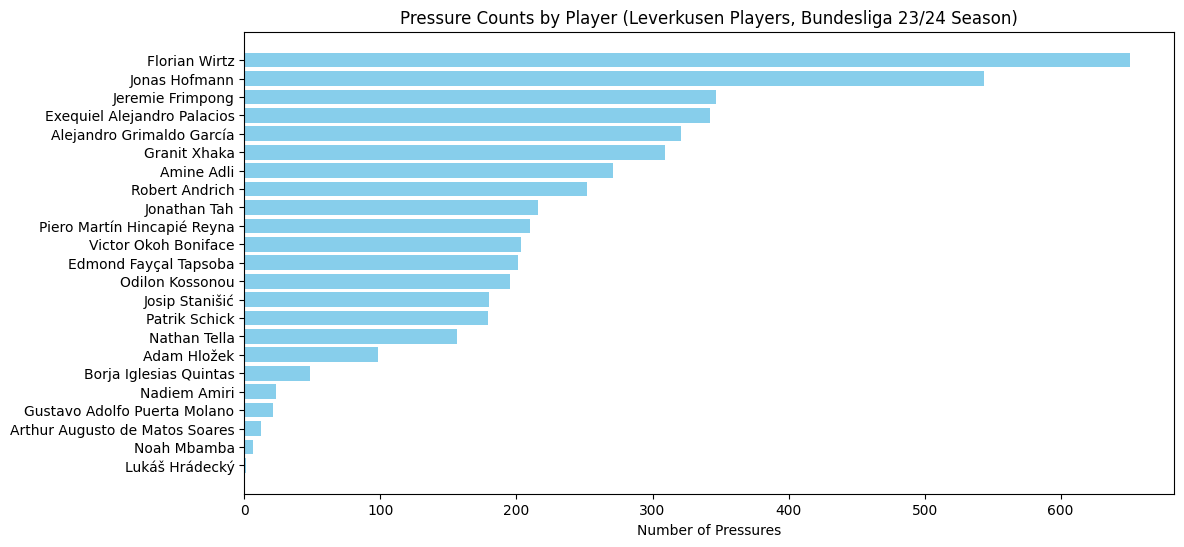

In [28]:
import matplotlib.pyplot as plt

# Extract unique player names
players = pressure_events['player'].unique()

# Create a dictionary to store the raw pressure count for each player
player_pressure_counts = {}

# Count raw pressures for each player
for player in players:
    # Filter events for the player
    player_events = pressure_events[pressure_events['player'] == player]
    if not player_events.empty:
        # Count the number of pressures for the player (raw count)
        player_pressure_counts[player] = len(player_events)

# Create a bar chart for pressure counts
players_sorted = sorted(player_pressure_counts.items(), key=lambda x: x[1], reverse=True)
players_names = [item[0] for item in players_sorted]
pressures_counts = [item[1] for item in players_sorted]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(players_names, pressures_counts, color='skyblue')
plt.xlabel('Number of Pressures')
plt.title('Pressure Counts by Player (Leverkusen Players, Bundesliga 23/24 Season)')
plt.gca().invert_yaxis()  # To display the player with the most pressures at the top
plt.show()


### Player-Specific Ball recovery zones

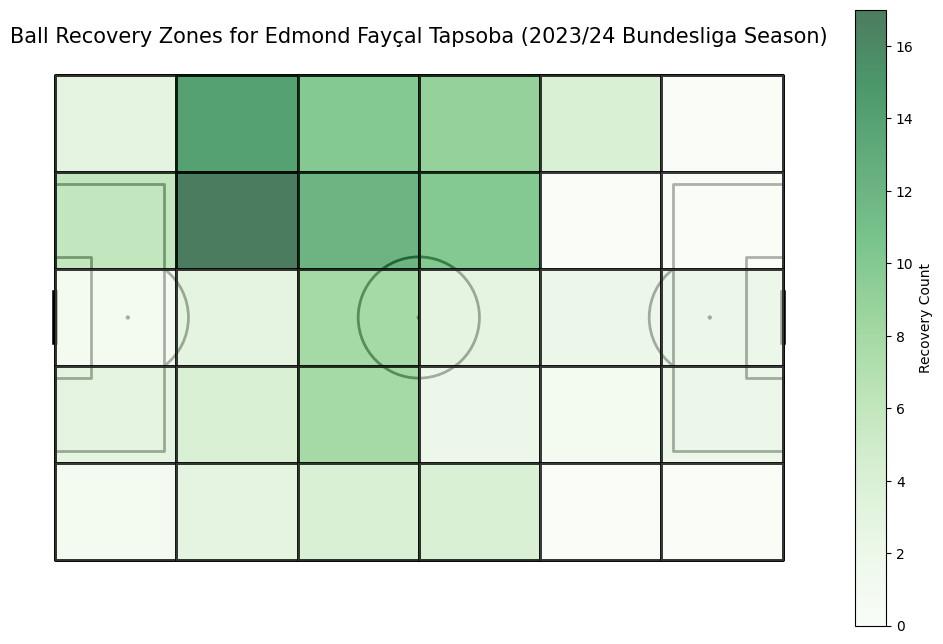

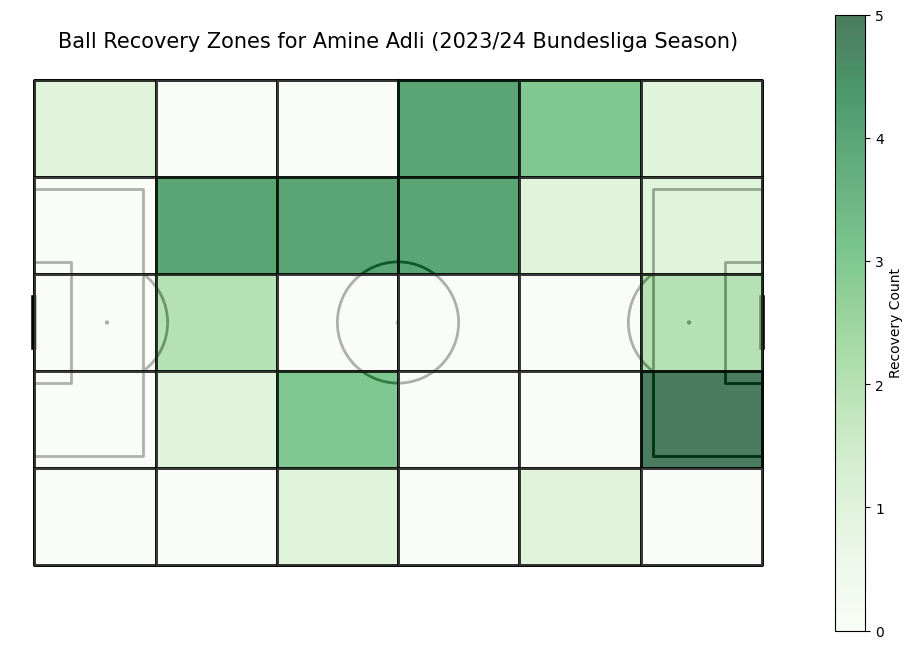

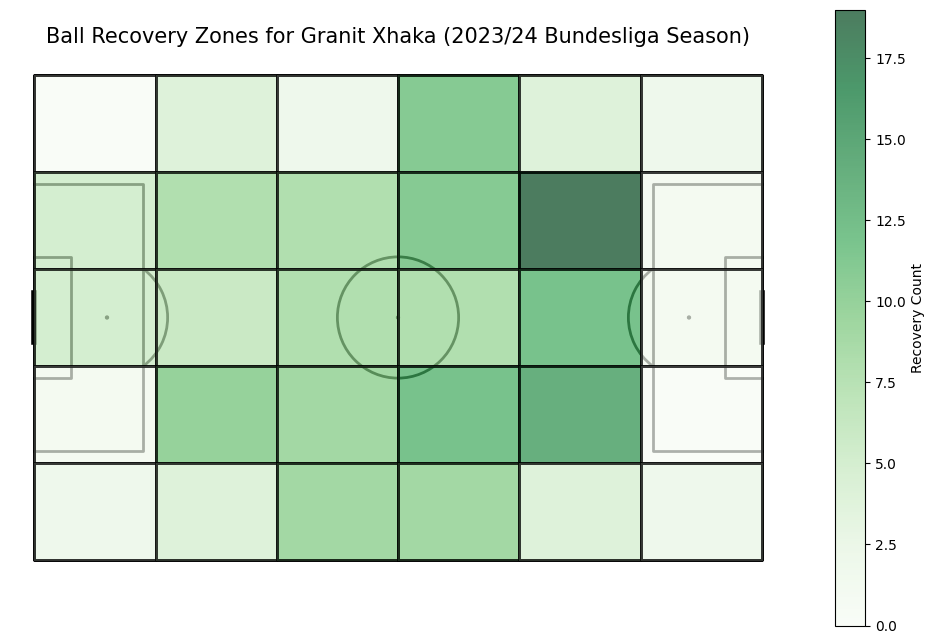

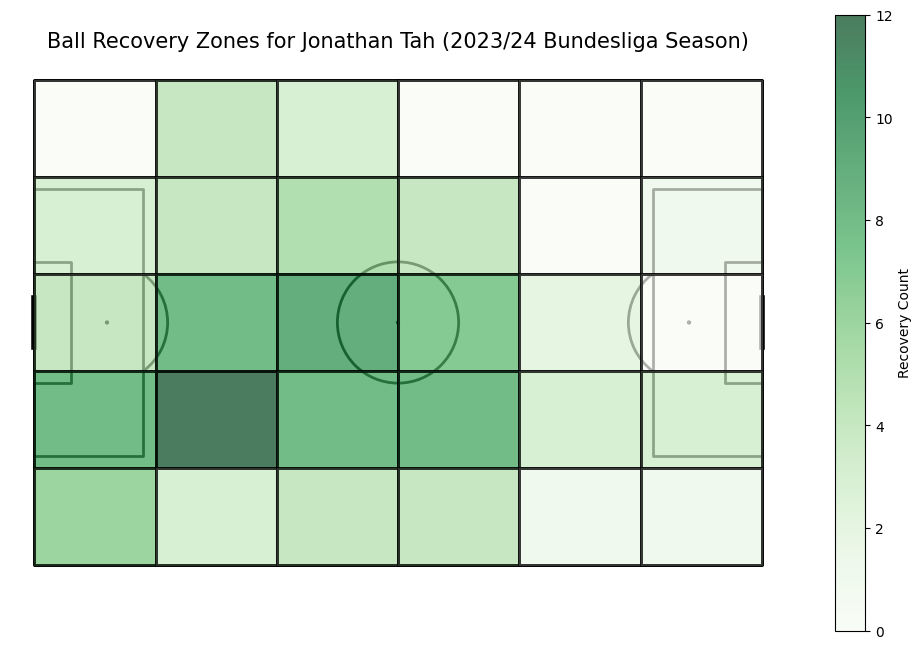

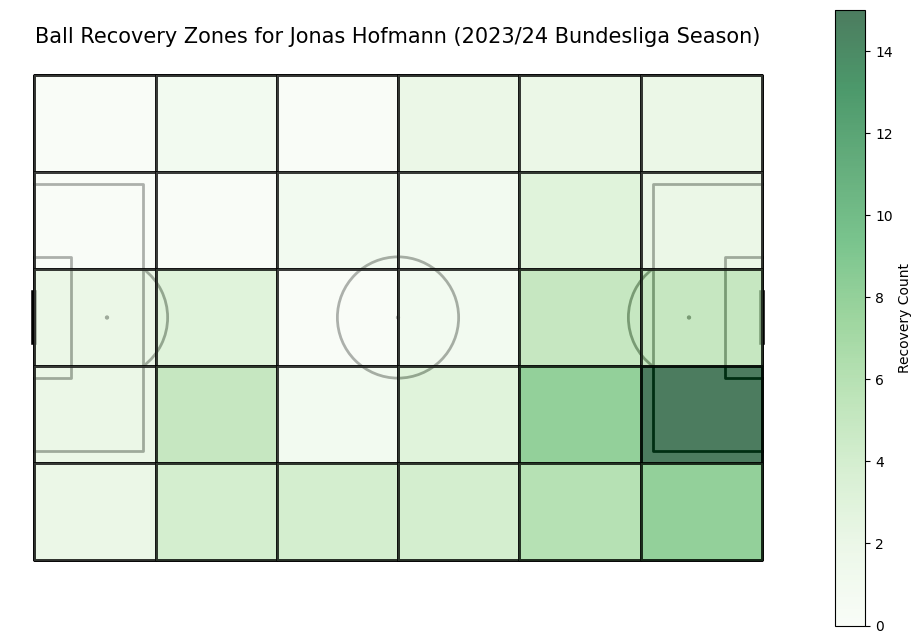

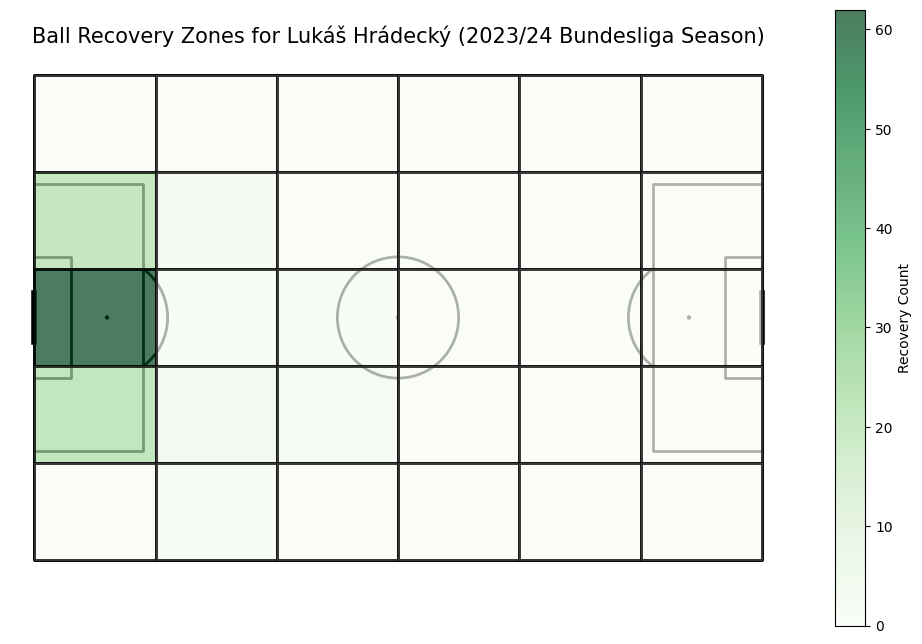

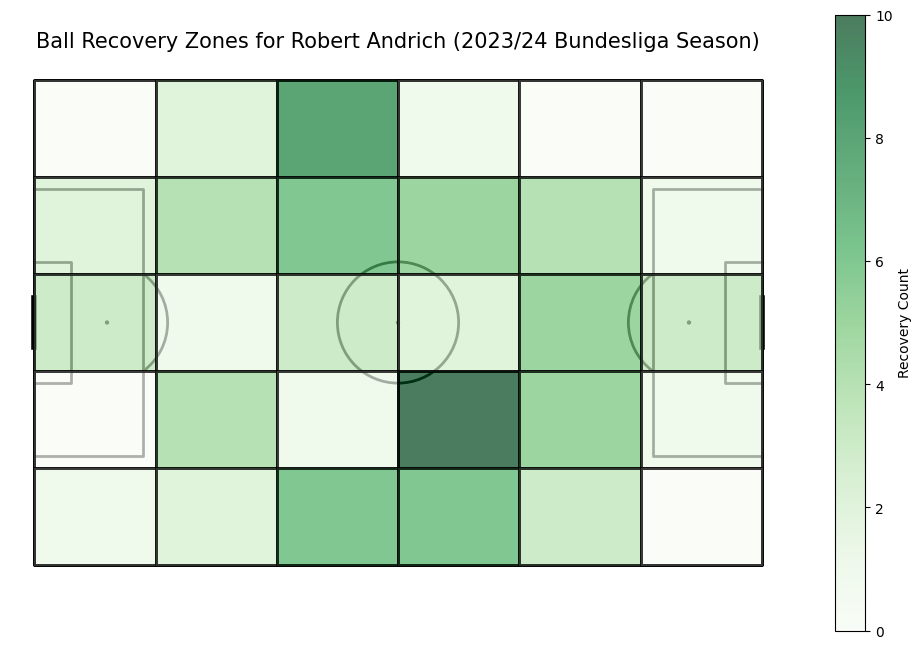

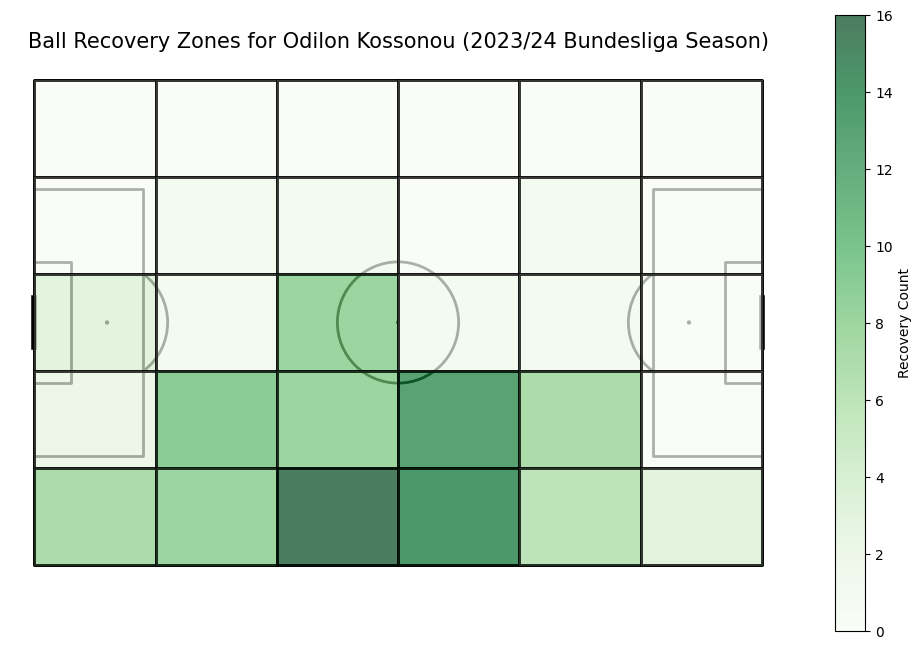

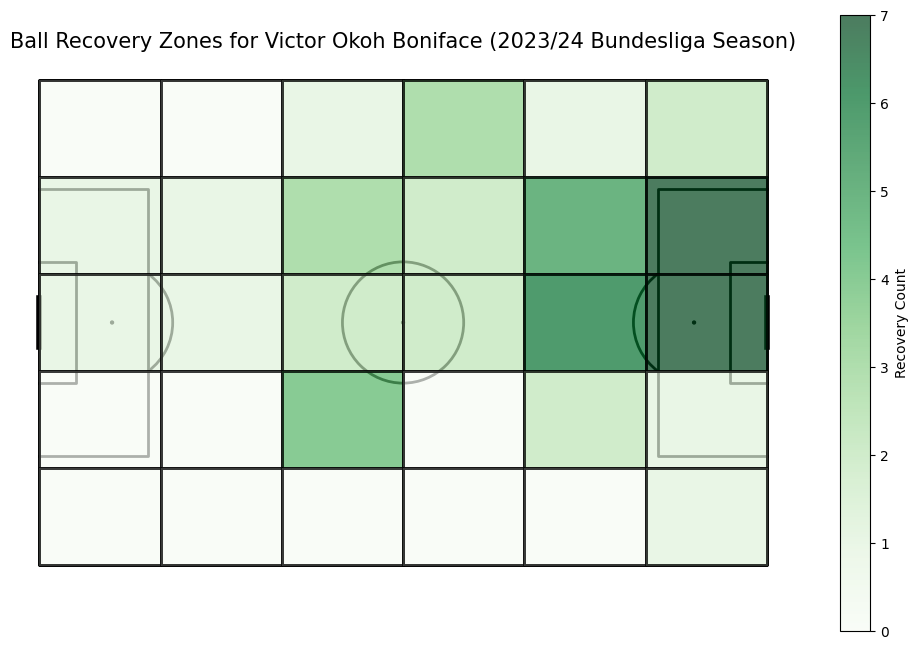

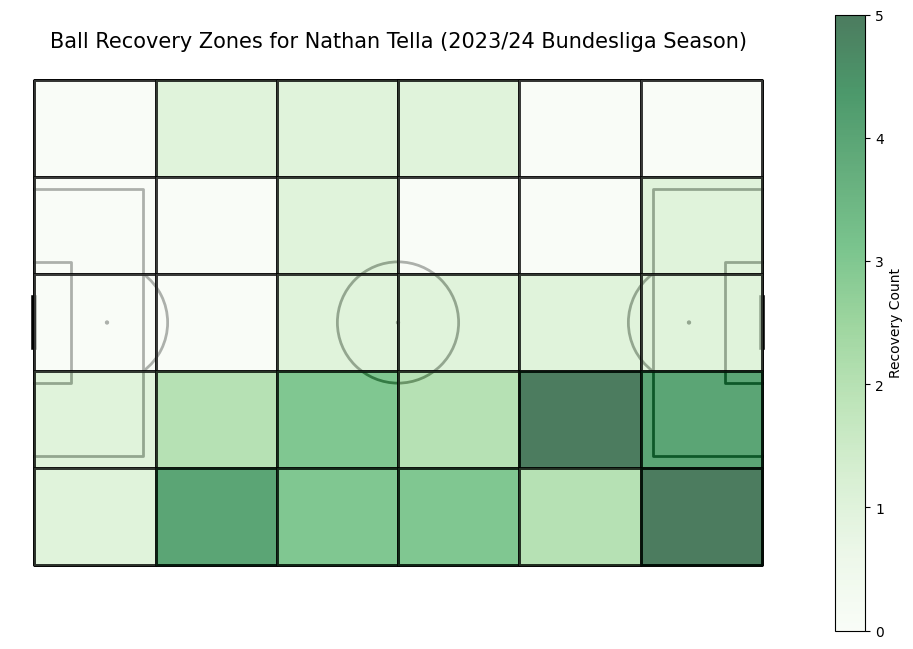

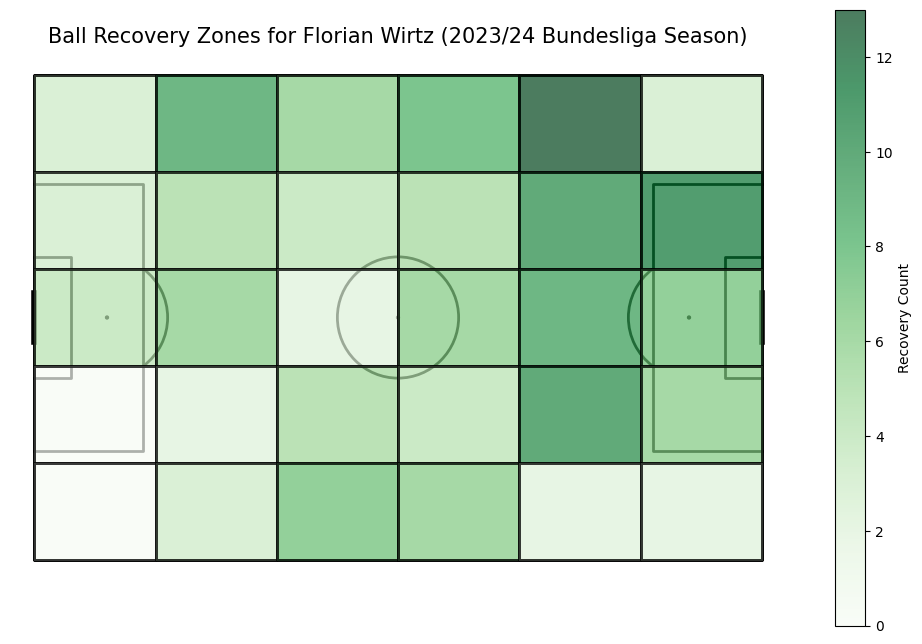

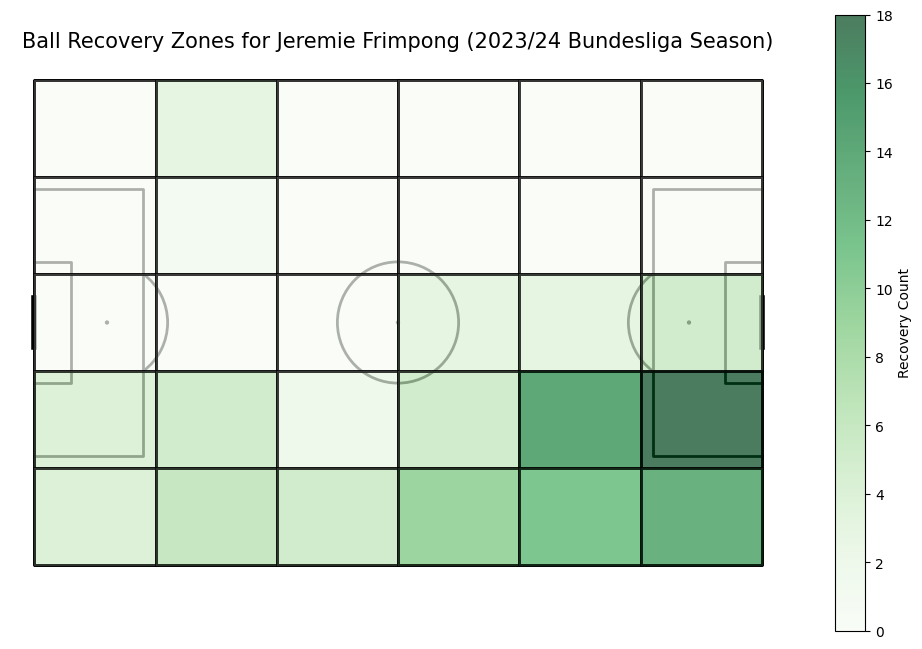

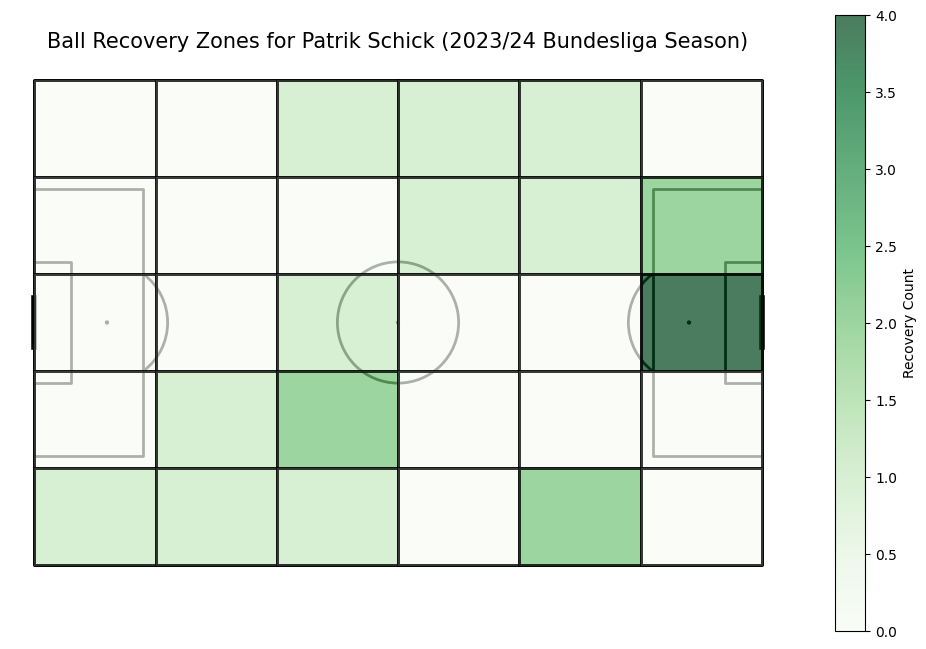

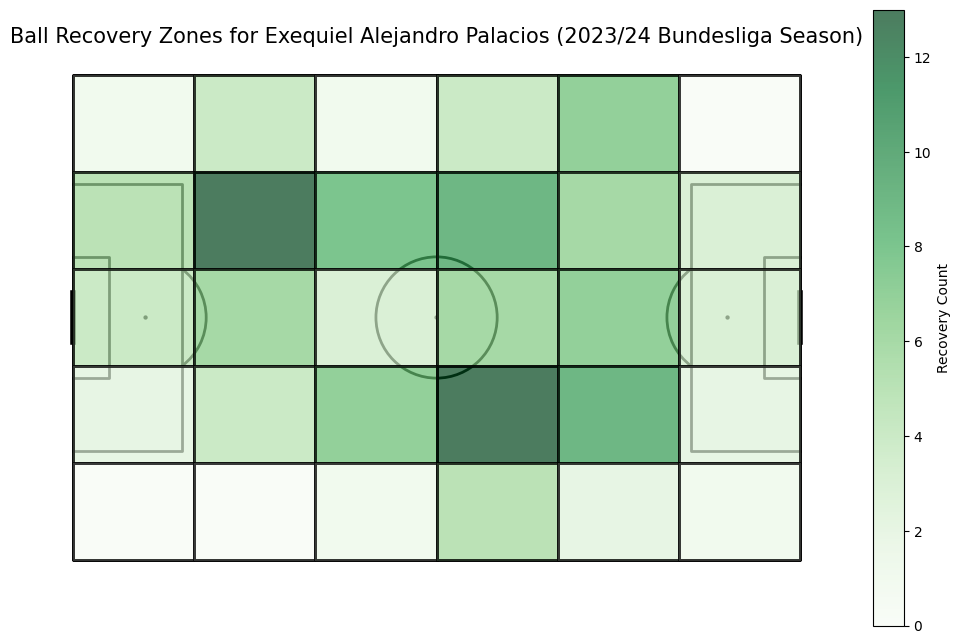

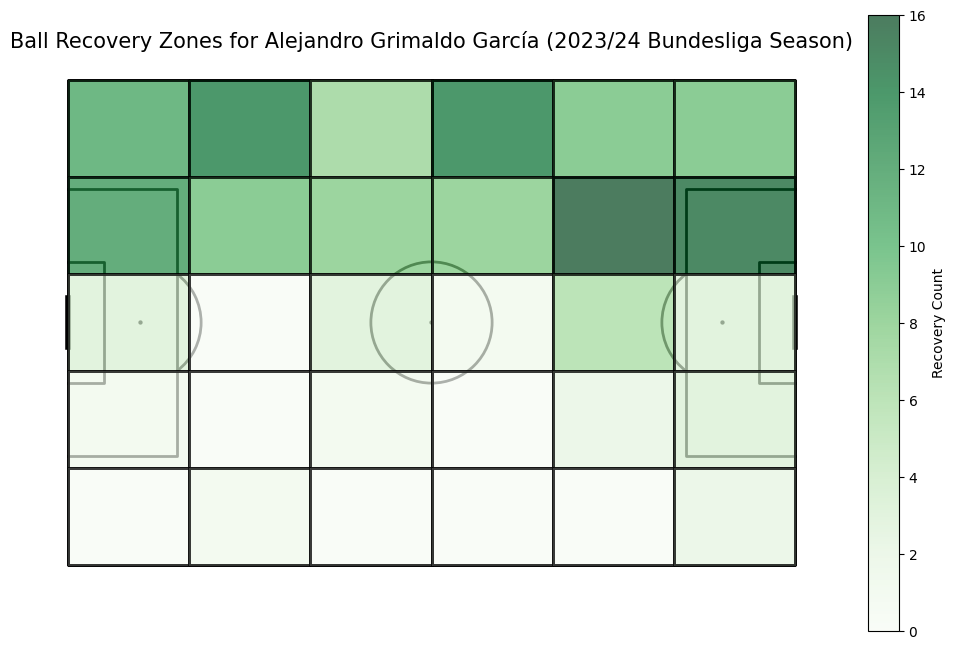

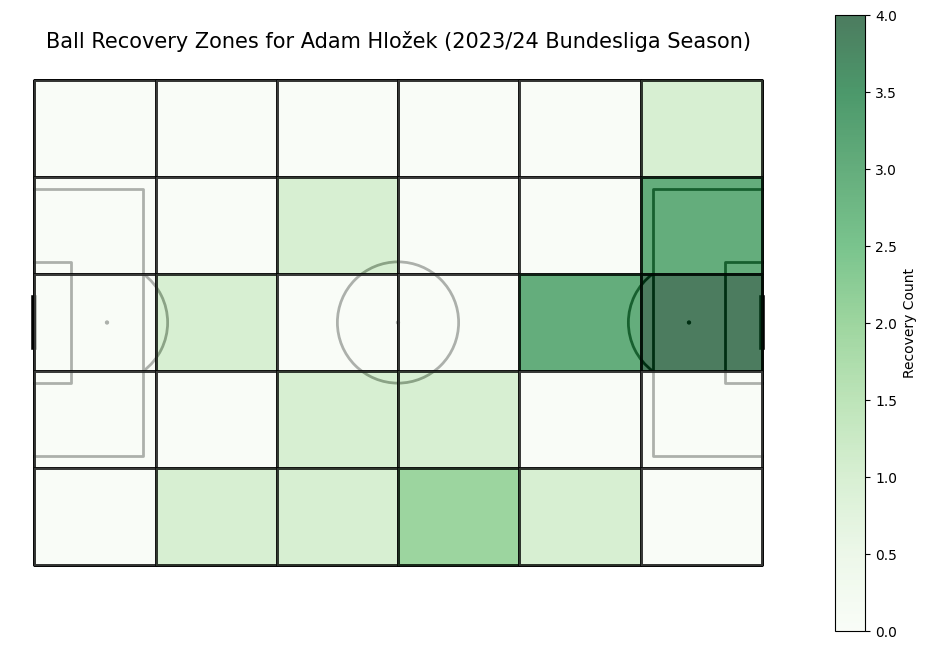

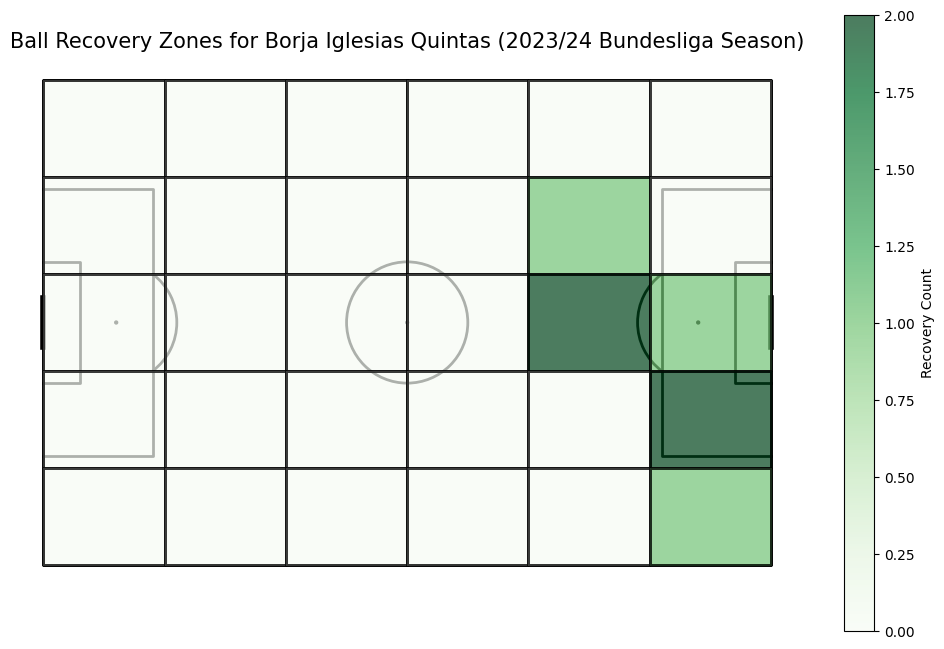

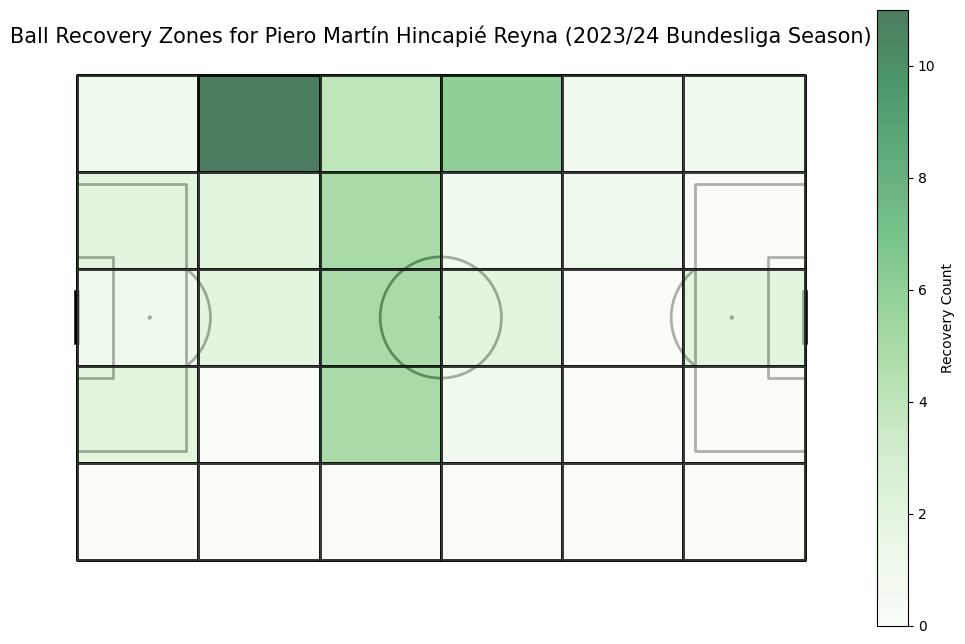

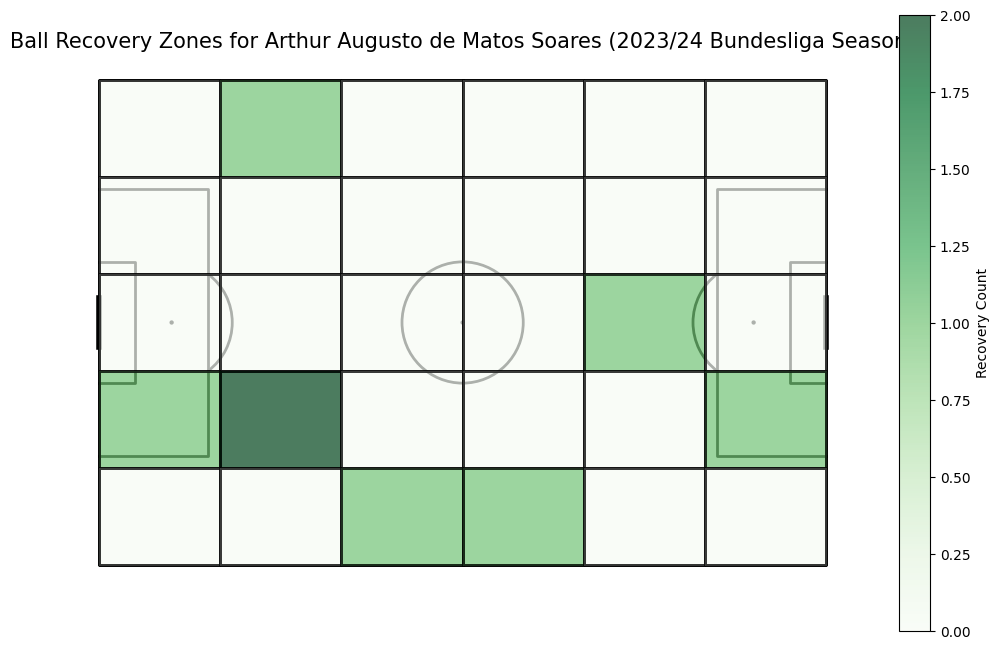

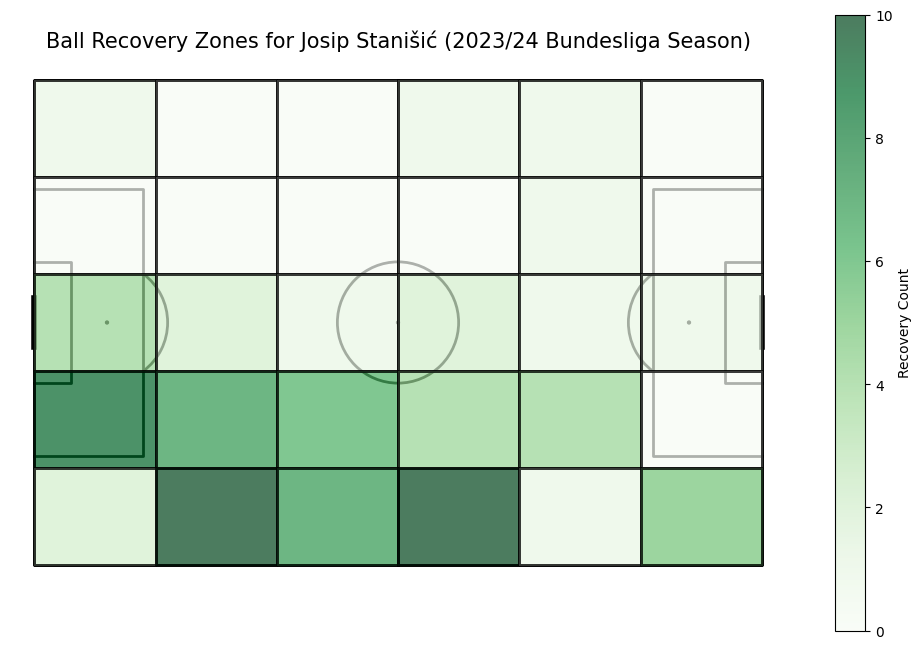

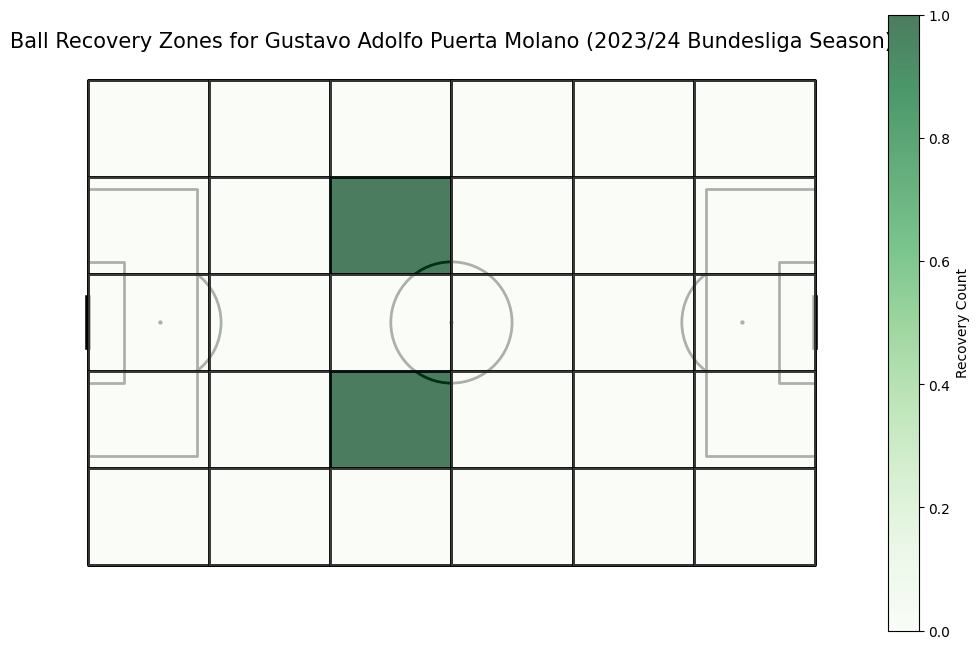

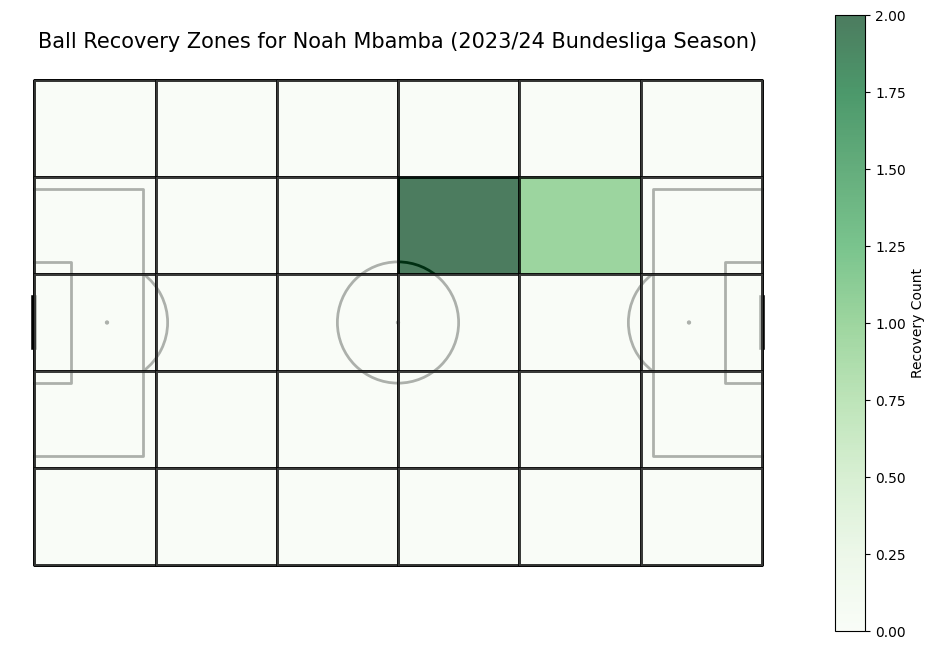

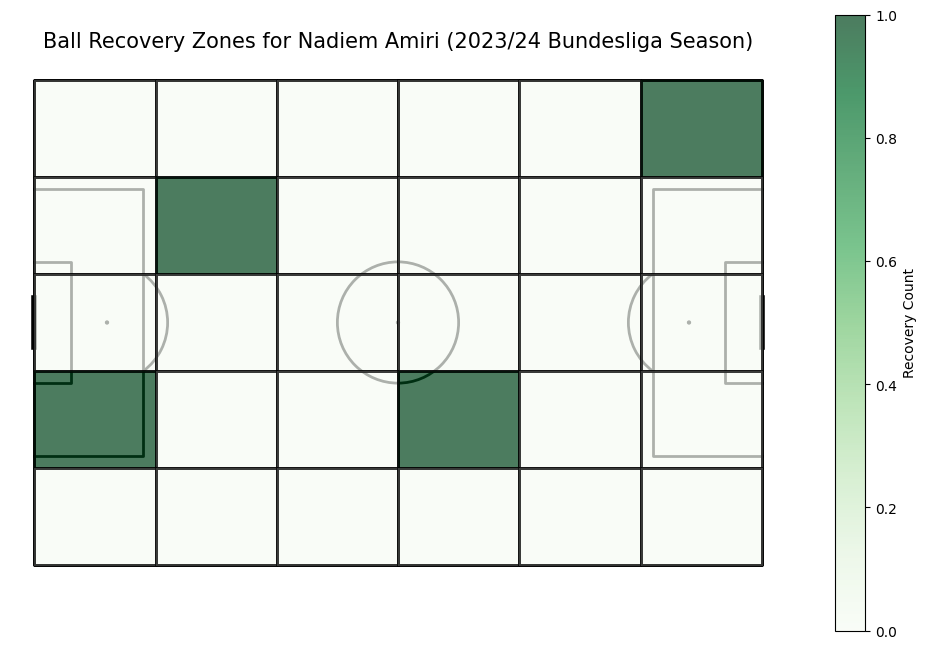

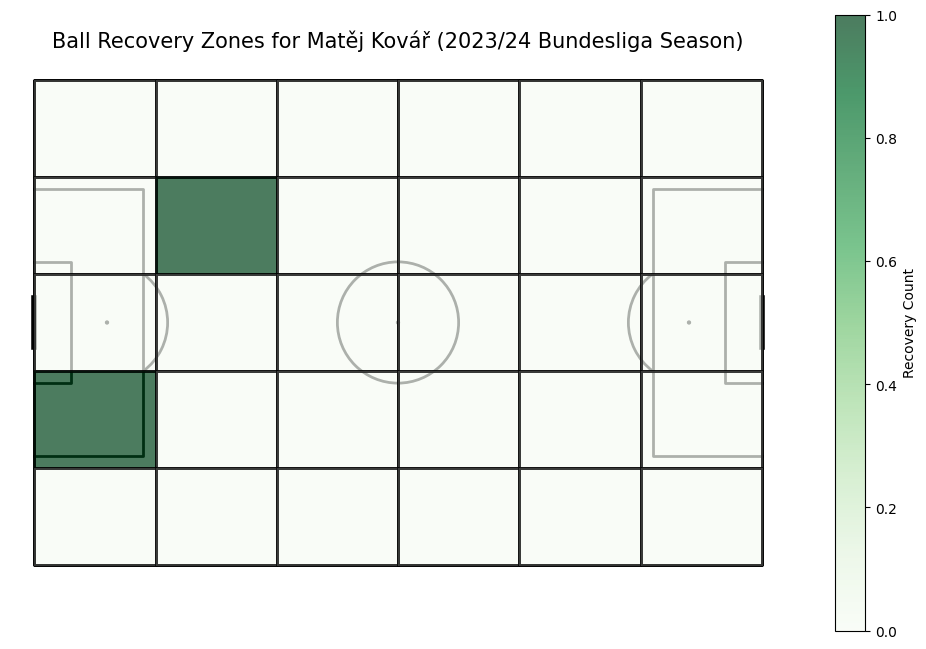

In [108]:

# Filter ball recovery events for Bayer Leverkusen
recovery_events = events_df[
    (events_df['team'] == "Bayer Leverkusen") & 
    (events_df['type'] == "Ball Recovery") & 
    (events_df['location'].notna())
]

# Extract unique player names
players = recovery_events['player'].unique()

# Define pitch zones (e.g., 6x5 grid)
bins_x = np.linspace(0, 120, 7)  # 6 vertical zones
bins_y = np.linspace(0, 80, 6)   # 5 horizontal zones
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Plot ball recovery heatmaps for each player
for player in players:
    # Filter events for the player
    player_events = recovery_events[recovery_events['player'] == player]
    if not player_events.empty:
        # Extract recovery locations
        recovery_locations = np.array(player_events['location'].tolist())

        # Calculate 2D histogram for the player (raw count, no normalization)
        recovery_heatmap, x_edges, y_edges = np.histogram2d(
            recovery_locations[:, 0],  # x-coordinates
            recovery_locations[:, 1],  # y-coordinates
            bins=[bins_x, bins_y]
        )

        # Prepare data for the heatmap function
        heatmap_data = {
            'x_grid': x_edges[:-1] + (x_edges[1] - x_edges[0]) / 2,  # center of bins on x-axis
            'y_grid': y_edges[:-1] + (y_edges[1] - y_edges[0]) / 2,  # center of bins on y-axis
            'statistic': recovery_heatmap.T  # Transpose to match correct orientation
        }

        # Plot the heatmap for the player
        fig, ax = pitch.draw(figsize=(10, 8))
        heatmap = pitch.heatmap(heatmap_data, ax=ax, cmap="Greens", alpha=0.7, edgecolors='black')

        # Add title and color bar
        fig.colorbar(heatmap, ax=ax, orientation='vertical', label='Recovery Count', shrink=0.8)
        ax.set_title(f"Ball Recovery Zones for {player} (2023/24 Bundesliga Season)", fontsize=15)
        plt.show()


## -------------------------------------------------------------------------------------------------------

# Get All Leverkusen Bundesliga Matches for Danger Passes analysis (code segment inspired from David Sumpter)

In [128]:
from mplsoccer import Pitch, Sbopen, VerticalPitch

parser = Sbopen()
df_match = parser.match(competition_id = 9, season_id = 281) #2023/24 bundesliga
#get a team
team = 'Bayer Leverkusen'
#get a list of matches
get_matchids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
                             
no_games = len(get_matchids)

In [68]:
print(get_matchids)


[3895302, 3895292, 3895333, 3895340, 3895348, 3895286, 3895220, 3895250, 3895266, 3895275, 3895180, 3895134, 3895121, 3895107, 3895074, 3895139, 3895086, 3895320, 3895309, 3895258, 3895244, 3895232, 3895210, 3895202, 3895194, 3895182, 3895167, 3895158, 3895153, 3895113, 3895095, 3895067, 3895060, 3895052]


In [70]:
#declare an empty dataframe
danger_passes = pd.DataFrame()
for idx in get_matchids:
    #open the event data from this game
    df = parser.event(idx)[0]
    for period in [1, 2]:
        #keep only accurate passes by Leverkusen that were not set pieces in this period
        mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull())
        #keep only necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        #keep only Shots by Leverkusen in this period
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
        #keep only necessary columns
        shots = df.loc[mask_shot, ["minute", "second"]]
        #convert time to seconds
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert to seconds
        pass_times = passes['minute']*60+passes['second']
        #check if pass is in any of the windows for this half
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())

        #keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
        #concatenate dataframe with a previous one to keep danger passes from the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index = True)

## Plotting location of danger passes with direction

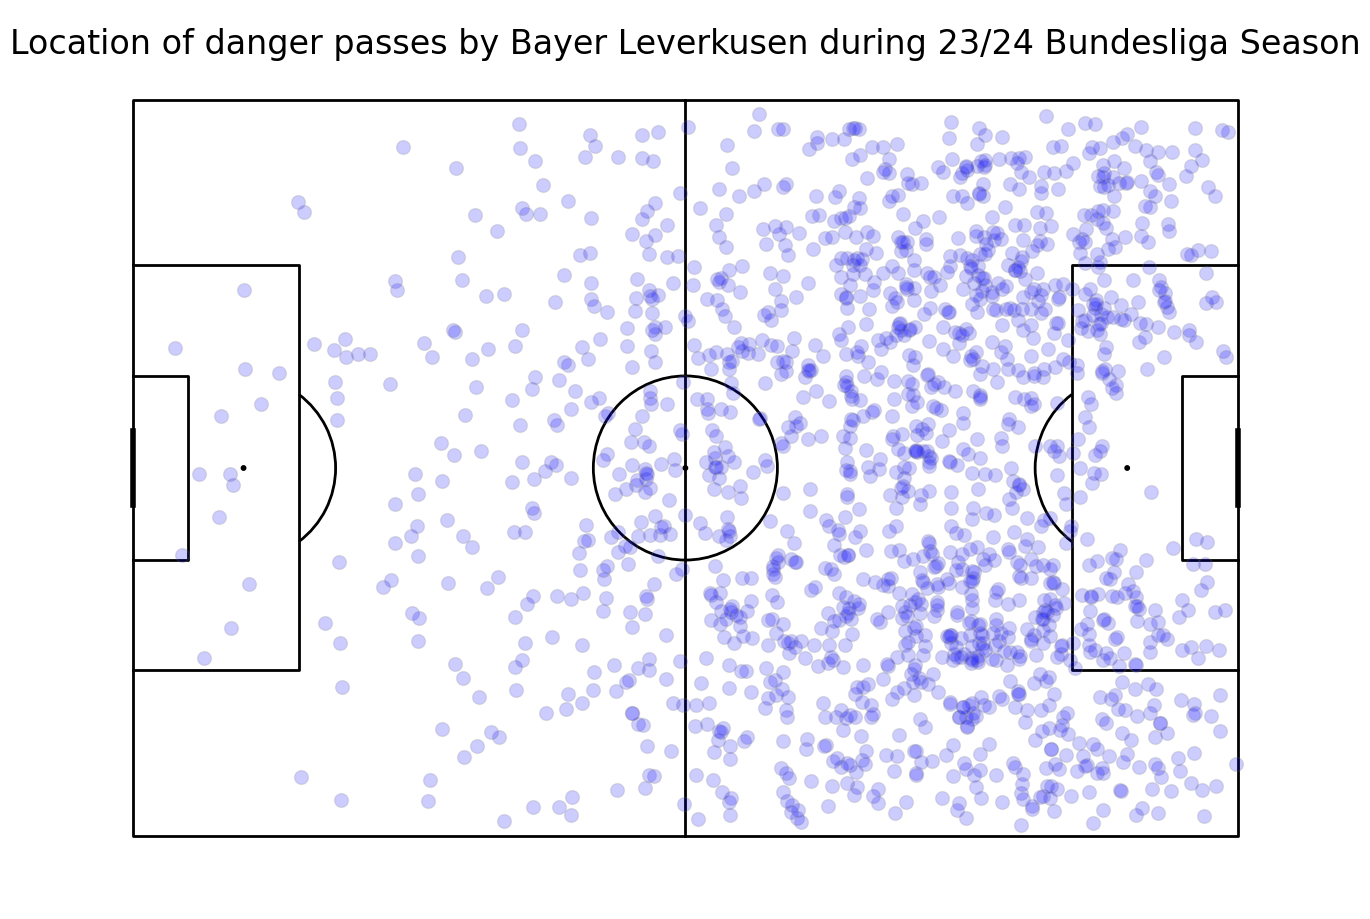

In [80]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
#to plot arrows
#pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'])
#add title
fig.suptitle('Location of danger passes by ' +team+ ' during 23/24 Bundesliga Season', fontsize = 24)
plt.show()

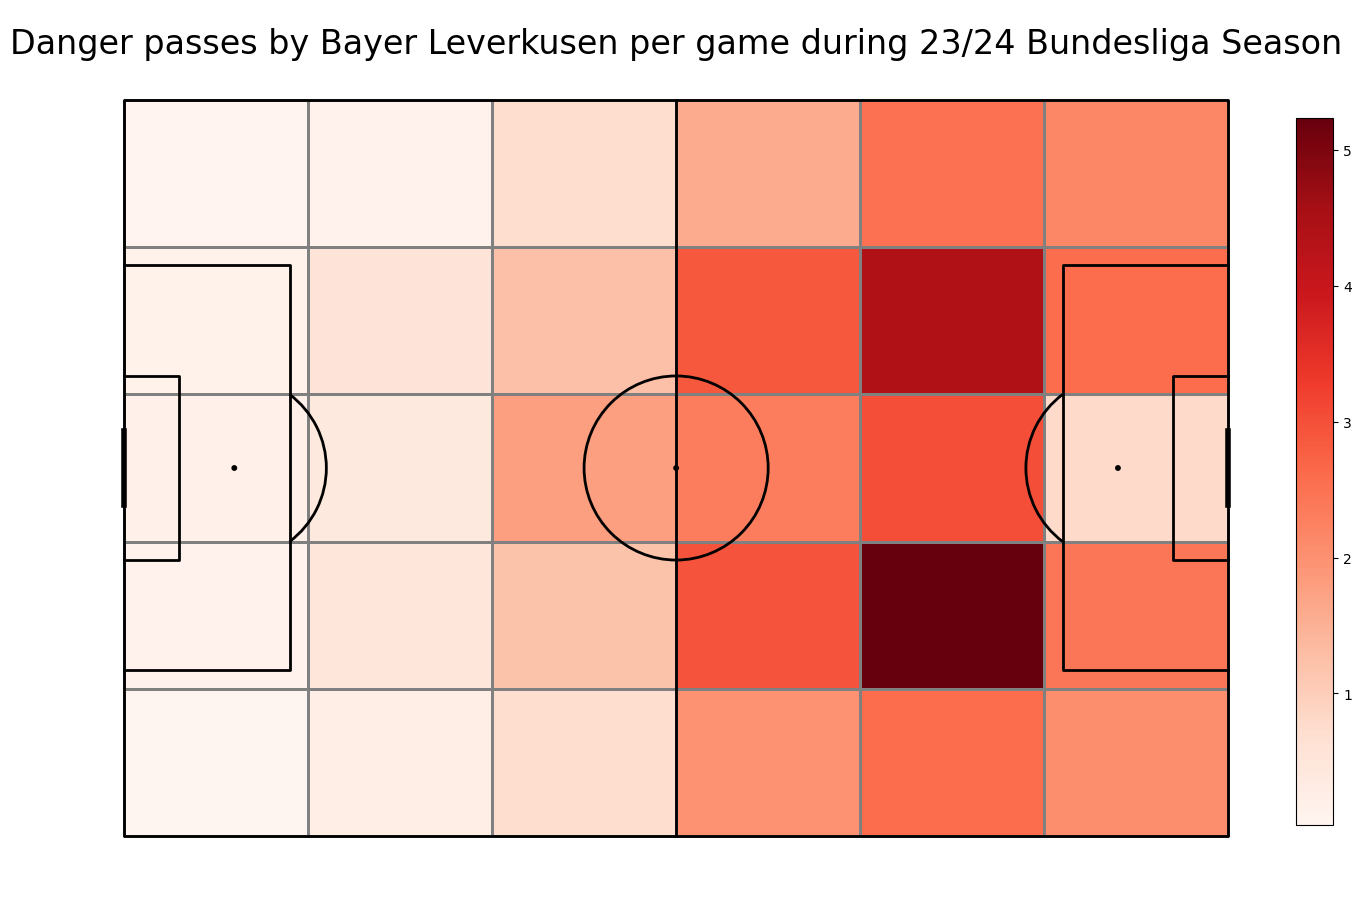

In [79]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + team + " per game during 23/24 Bundesliga Season", fontsize = 24)
plt.show()

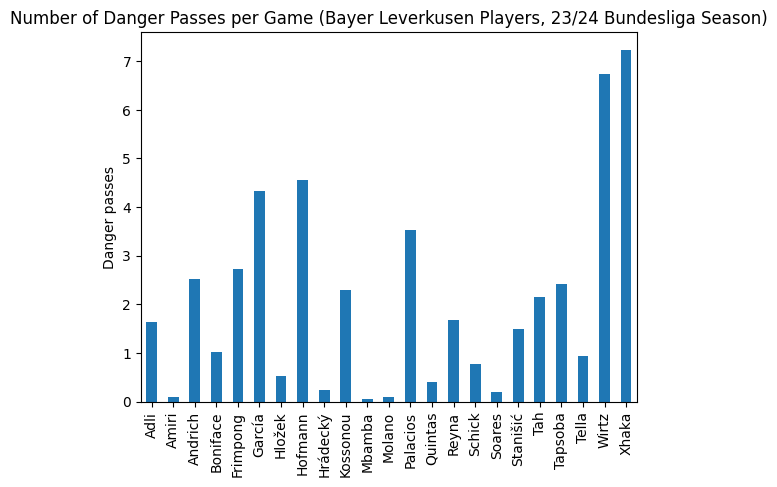

In [77]:
#keep only surnames
danger_passes["player_name"] = danger_passes["player_name"].apply(lambda x: str(x).split()[-1])
#count passes by player and normalize them
pass_count = danger_passes.groupby(["player_name"]).x.count()/no_games
#make a histogram
ax = pass_count.plot.bar(pass_count)
#make legend
ax.set_xlabel("")
ax.set_ylabel("Danger passes")
ax.set_title("Number of Danger Passes per Game (Bayer Leverkusen Players, 23/24 Bundesliga Season)")
plt.show()

## filtering the danger passes for shots with xG >0.25

In [129]:
# Declare an empty dataframe
danger_passes = pd.DataFrame()

for idx in get_matchids:
    # Open the event data from this game
    df = parser.event(idx)[0]
    for period in [1, 2]:
        # Keep only accurate passes by Leverkusen that were not set pieces in this period
        mask_pass = (
            (df.team_name == team)
            & (df.type_name == "Pass")
            & (df.outcome_name.isnull())
            & (df.period == period)
            & (df.sub_type_name.isnull())
        )
        # Keep only necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]

        # Keep only shots by Leverkusen in this period with high xG (>0.25)
        mask_shot = (
            (df.team_name == team)
            & (df.type_name == "Shot")
            & (df.period == period)
            & (df.shot_statsbomb_xg > 0.25)
        )
        # Keep only necessary columns for shots
        shots = df.loc[mask_shot, ["minute", "second", "shot_statsbomb_xg"]]

        # Convert shot times to seconds
        shot_times = shots["minute"] * 60 + shots["second"]
        shot_window = 15  # Specify the window duration in seconds

        # Find starts of the window
        shot_start = shot_times - shot_window
        # Condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i > 0 else (period - 1) * 45)

        # Convert pass times to seconds
        pass_times = passes["minute"] * 60 + passes["second"]
        # Check if a pass is within any of the shot windows for this half
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())

        # Keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
        # Concatenate dataframes to store danger passes for the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index=True)


## plotting passes with xG>0.25

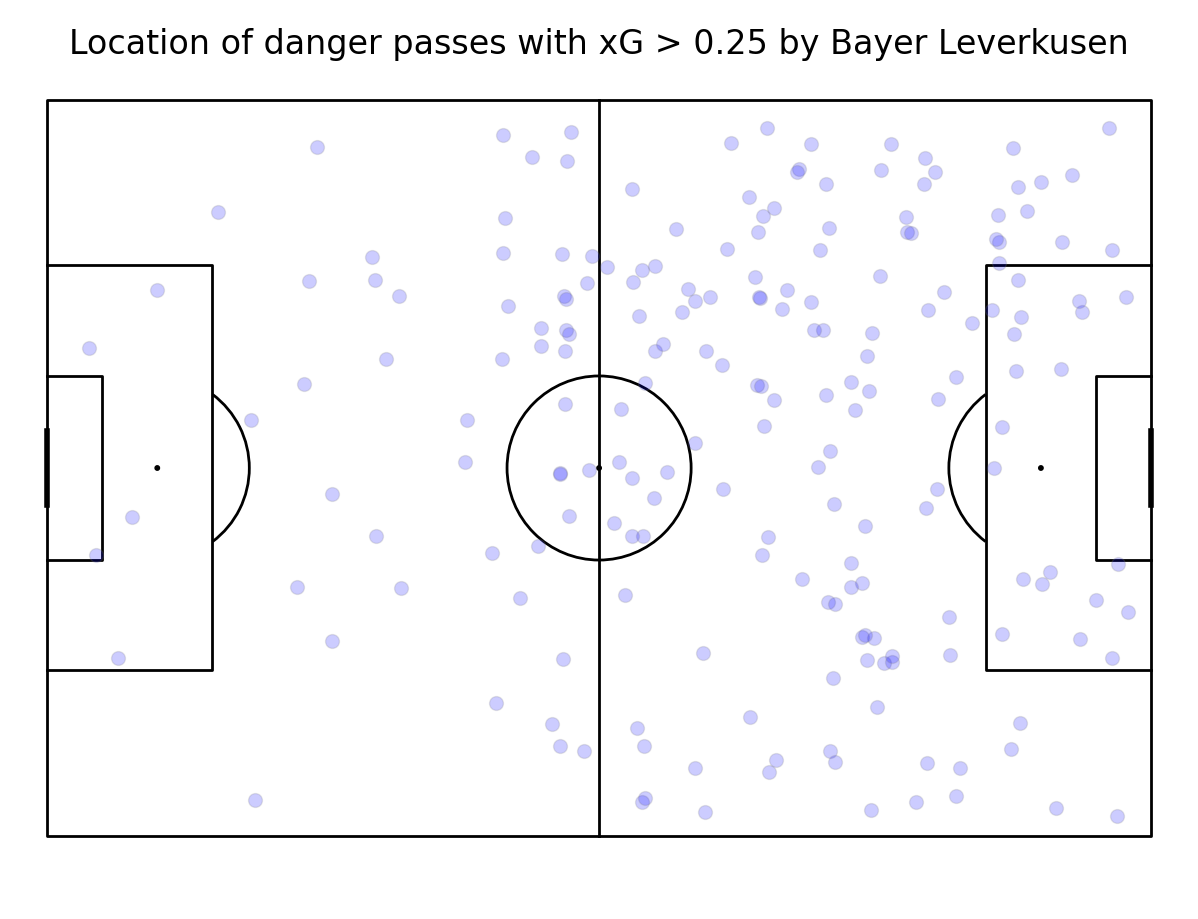

In [130]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
#uncomment it to plot arrows
#pitch.arrows(danger_passes_.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'])
#add title
fig.suptitle('Location of danger passes with xG > 0.25 by ' + team, fontsize = 24)
plt.show()

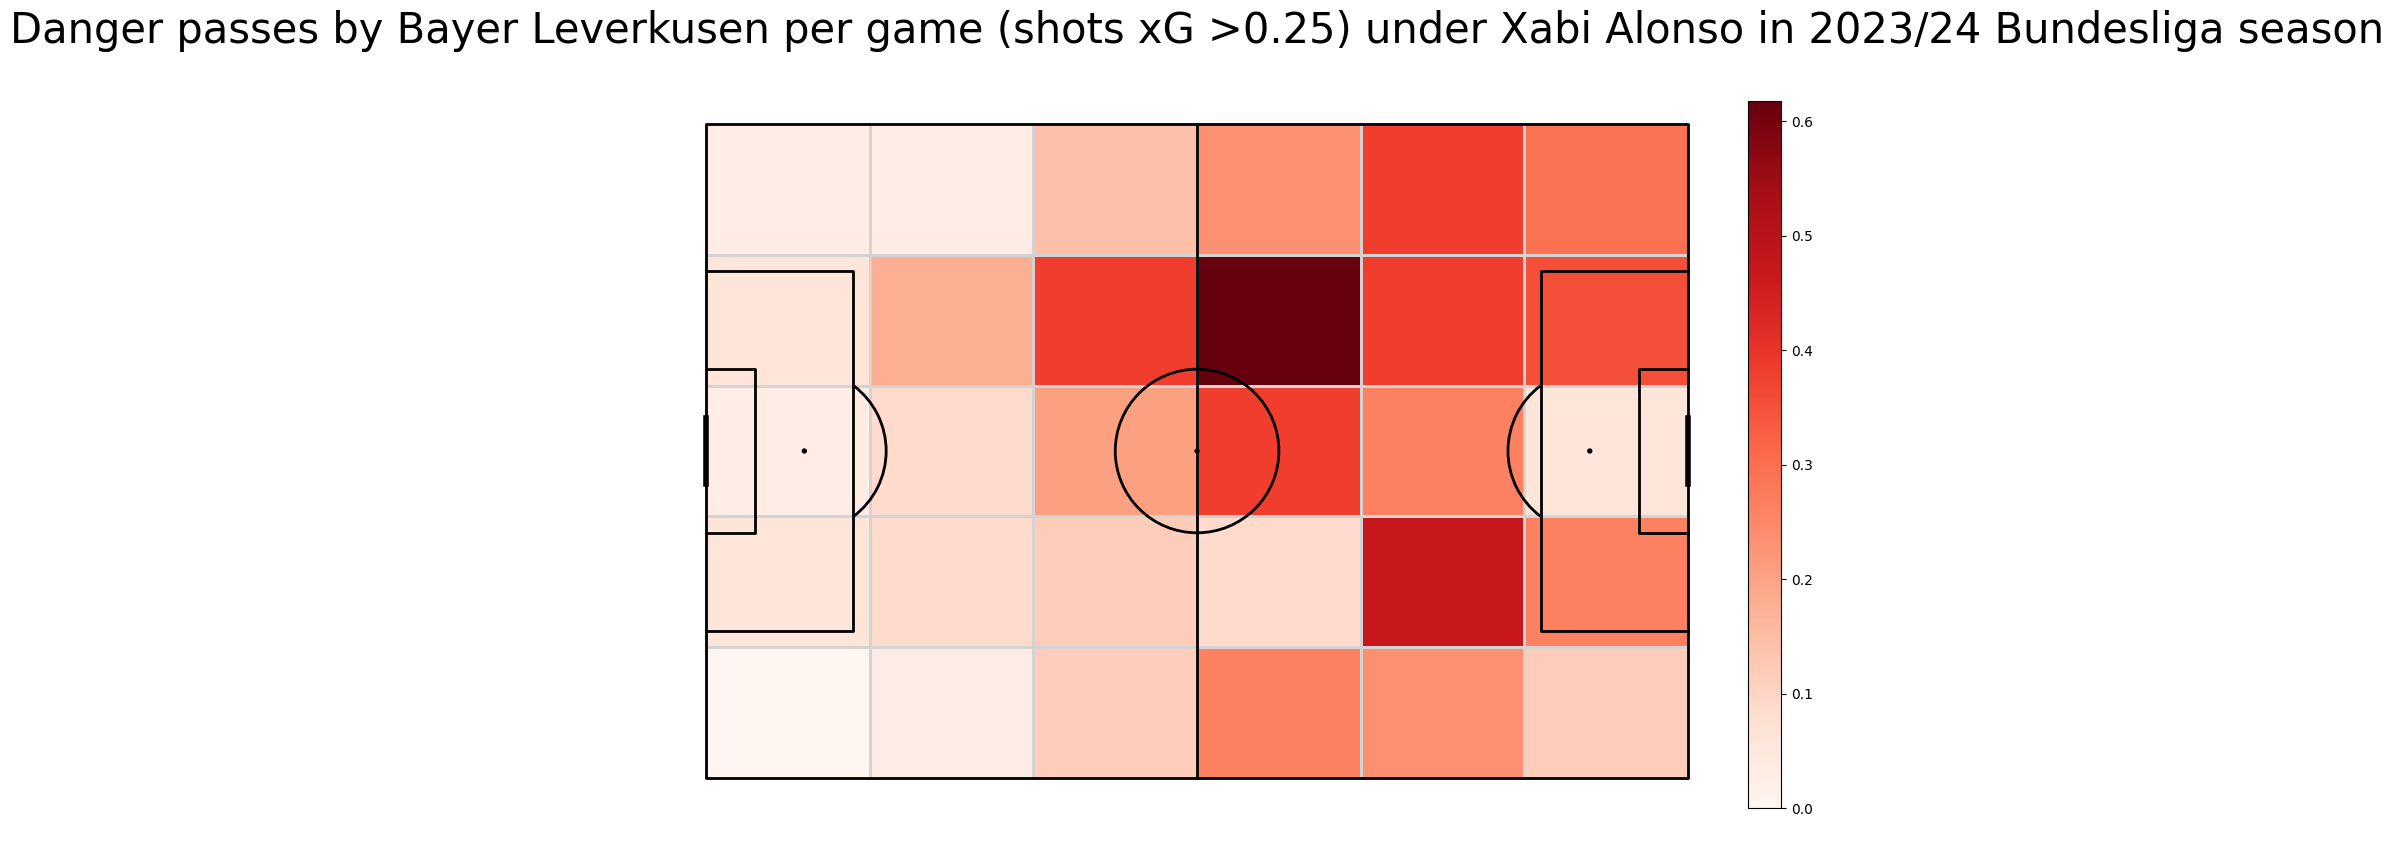

In [131]:
#plot vertical pitch
pitch = Pitch (line_zorder = 2, line_color = 'black')
fig, ax = pitch.grid (grid_height = 0.8, title_height = 0.06, axis = False, endnote_height = 0.04, title_space = 0,
                     endnote_space = 0)
#get 2d histogram plot
bin_stat = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic = 'count', bins = (6,5), normalize = False)
#normalise by number of games
bin_stat["statistic"] = bin_stat["statistic"]/no_games
#make heatmap
pcm = pitch.heatmap(bin_stat, cmap = 'Reds', edgecolor = 'lightgrey', ax = ax['pitch'])

#legend to the plot
ax_cbar = fig.add_axes ((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
fig.suptitle('Danger passes by ' + team + " per game (shots xG >0.25) under Xabi Alonso in 2023/24 Bundesliga season", fontsize = 30)
plt.show()

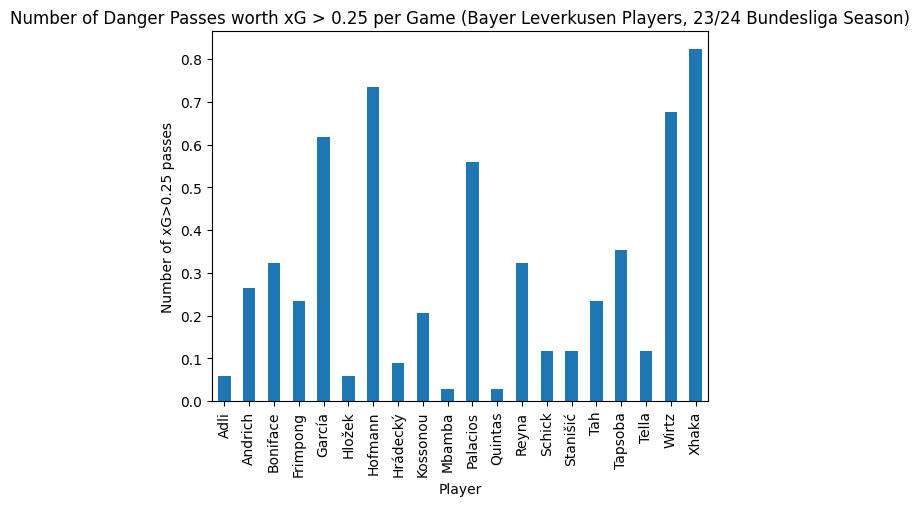

In [132]:
#keep only surnames for better visualisation
danger_passes ["player_name"] =  danger_passes ["player_name"]. apply (lambda x: str(x). split()[-1])
#count passes by players and normalize them
pass_count = danger_passes.groupby(["player_name"]).x.count()/no_games
#make histogram
ax = pass_count.plot.bar(pass_count)
#title and other aesthetics
ax.set_xlabel("Player")
ax.set_ylabel("Number of xG>0.25 passes")
ax.set_title("Number of Danger Passes worth xG > 0.25 per Game (Bayer Leverkusen Players, 23/24 Bundesliga Season)")
plt.show()

In [90]:
danger_passes

,x,y,end_x,end_y,minute,second,player_name
0,27.2,52.9,30.9,42.8,82,22,Andrich
1,31.0,42.8,83.3,25.5,82,24,Palacios
2,66.1,27.3,89.4,55.4,89,21,García
3,116.3,77.8,110.8,75.9,94,26,Boniface
4,98.8,75.6,83.2,72.0,94,29,García
...,...,...,...,...,...,...,...
198,4.6,27.0,61.1,20.5,47,13,Hrádecký
199,58.7,19.9,49.2,29.2,47,17,Boniface
200,49.4,28.2,57.6,11.9,47,18,Xhaka
201,64.7,18.5,76.5,9.5,47,21,Wirtz


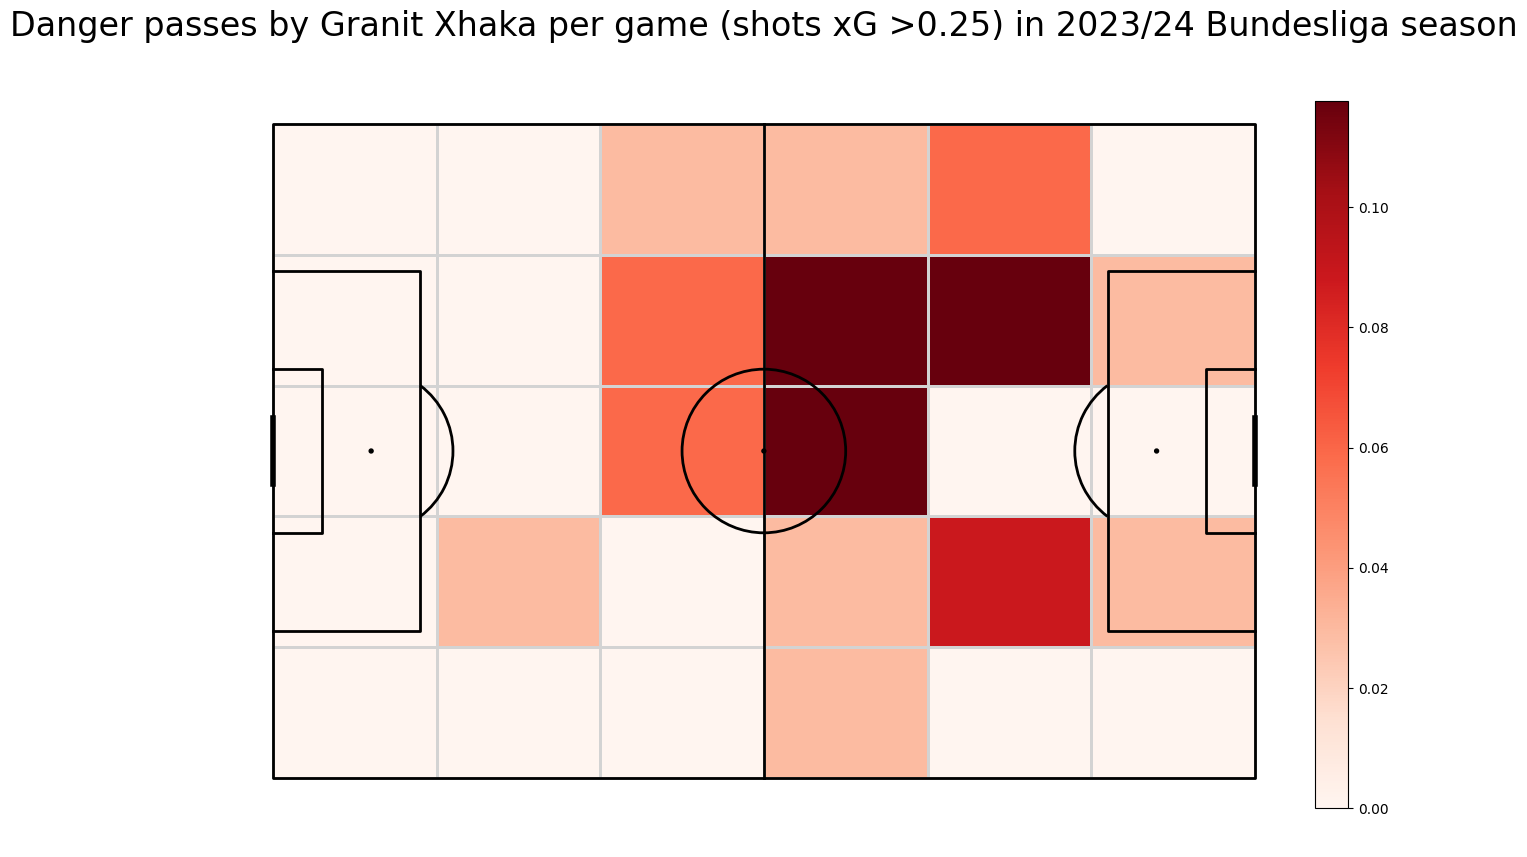

In [133]:
# Filter passes made only by Coutinho
d_passes = danger_passes[danger_passes['player_name'] == 'Xhaka']

# Plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.8, title_height=0.06, axis=False, endnote_height=0.04, title_space=0,
                     endnote_space=0)

# Get 2D histogram plot for Firmino's danger passes
bin_stat = pitch.bin_statistic(d_passes.x, d_passes.y, statistic='count', bins=(6, 5), normalize=False)

# Normalize by number of games
bin_stat["statistic"] = bin_stat["statistic"] / no_games

# Make heatmap
pcm = pitch.heatmap(bin_stat, cmap='Reds', edgecolor='lightgrey', ax=ax['pitch'])

# Add legend to the plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by Granit Xhaka per game (shots xG >0.25) in 2023/24 Bundesliga season', fontsize=24)
plt.show()


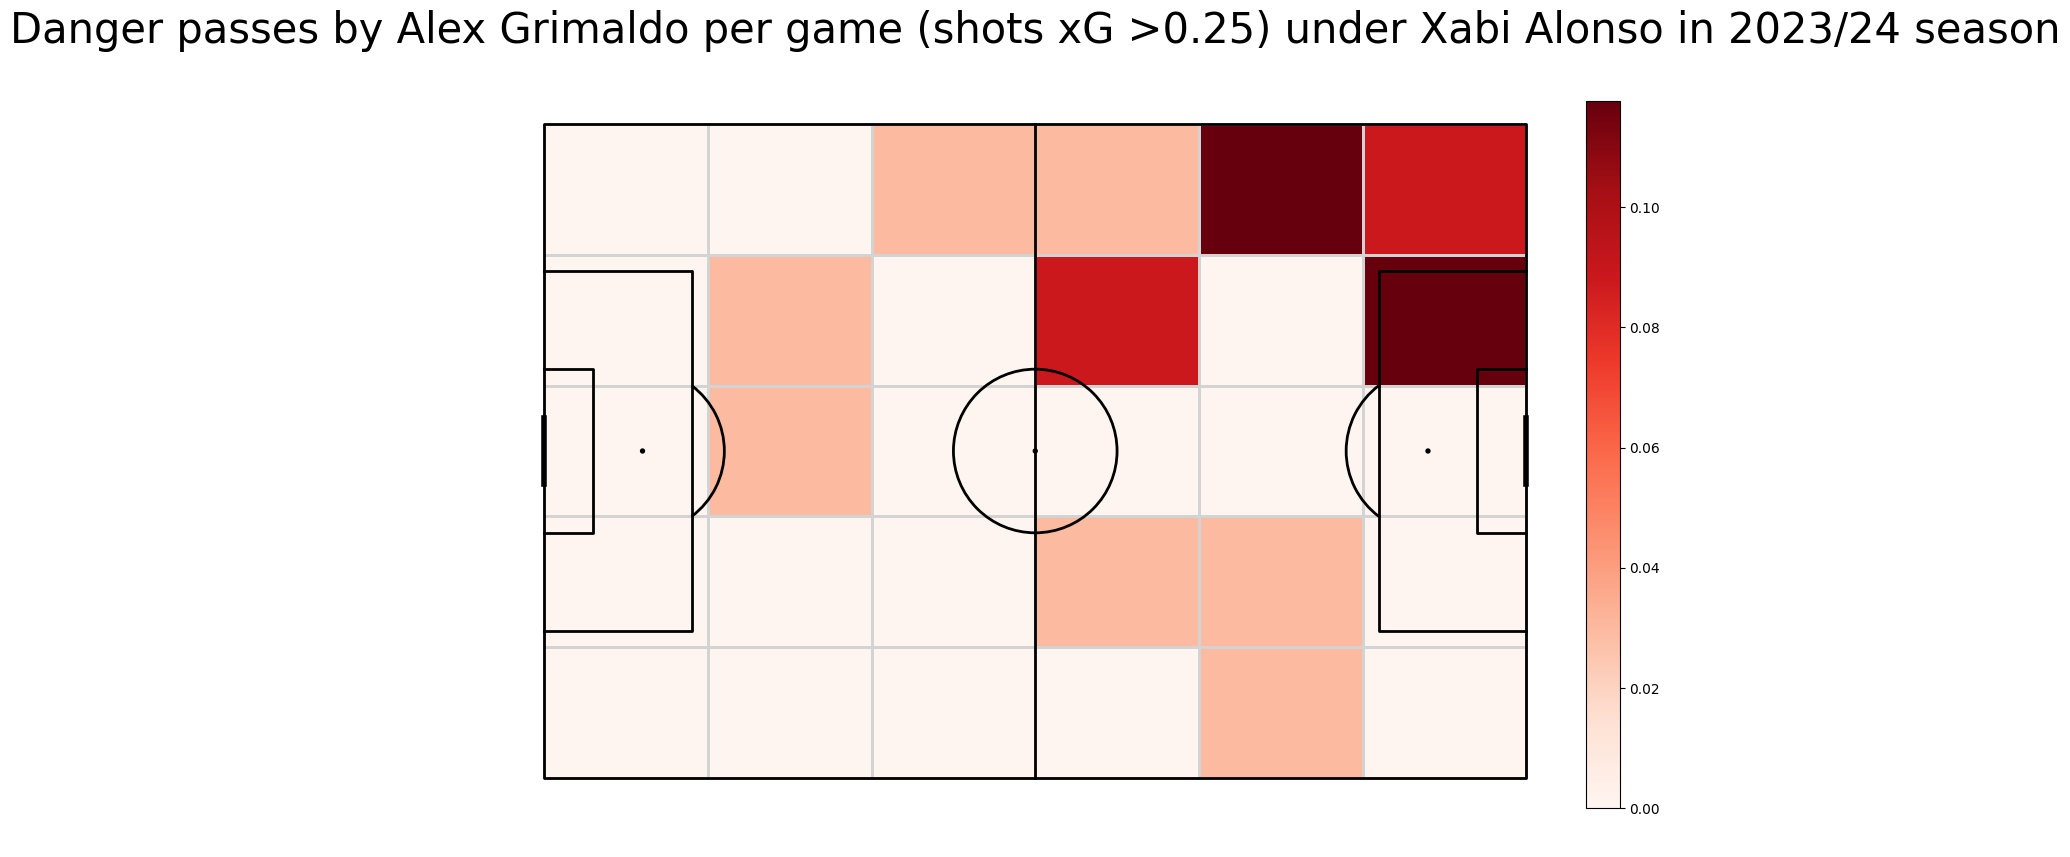

In [93]:
# Filter passes made only by Coutinho
d_passes = danger_passes[danger_passes['player_name'] == 'García']

# Plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.8, title_height=0.06, axis=False, endnote_height=0.04, title_space=0,
                     endnote_space=0)

# Get 2D histogram plot for Firmino's danger passes
bin_stat = pitch.bin_statistic(d_passes.x, d_passes.y, statistic='count', bins=(6, 5), normalize=False)

# Normalize by number of games
bin_stat["statistic"] = bin_stat["statistic"] / no_games

# Make heatmap
pcm = pitch.heatmap(bin_stat, cmap='Reds', edgecolor='lightgrey', ax=ax['pitch'])

# Add legend to the plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by Alex Grimaldo per game (shots xG >0.25) under Xabi Alonso in 2023/24 season', fontsize=30)
plt.show()


## --------------------------------------------------------------------------------------------------------------